In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
import os

plt.rc("font", family="Malgun Gothic")
plt.rc("axes", unicode_minus=False)

In [3]:
# 흐린글씨 좀 더 선명하게
%config InlineBackend.figure_format = 'retina'

<img src="https://i.imgur.com/Twtlh6W.png">

<img src="https://i.imgur.com/GJqg05v.png">

*  http://nhiss.nhis.or.kr/op/it/index.do
* https://www.data.go.kr/dataset/15007122/fileData.do

In [4]:
df = pd.read_csv("./국민건강보험공단_건강검진정보_20211229.CSV", encoding="cp949")
df.shape

(1000000, 31)

### 데이터 미리보기

In [5]:
df.head()

,기준년도,가입자 일련번호,시도코드,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,치석,데이터 공개일자
0,2020,1,36,1,9,165,60,72.1,1.2,1.5,...,1.1,21.0,27.0,21.0,1.0,0.0,0,NaN,NaN,2021-12-29
1,2020,2,27,2,13,150,65,81.0,0.8,0.8,...,0.5,18.0,15.0,15.0,1.0,0.0,0,NaN,NaN,2021-12-29
2,2020,3,11,2,12,155,55,70.0,0.6,0.7,...,0.7,27.0,25.0,7.0,1.0,0.0,0,NaN,NaN,2021-12-29
3,2020,4,31,1,13,160,70,90.8,1.0,1.0,...,1.2,65.0,97.0,72.0,1.0,0.0,1,0.0,0.0,2021-12-29
4,2020,5,41,2,12,155,50,75.2,1.5,1.2,...,0.7,18.0,17.0,14.0,1.0,0.0,0,NaN,NaN,2021-12-29


In [6]:
df.tail()

,기준년도,가입자 일련번호,시도코드,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,치석,데이터 공개일자
999995,2020,999996,41,2,13,145,55,81.0,0.9,1.0,...,0.6,21.0,25.0,18.0,1.0,0.0,0,NaN,NaN,2021-12-29
999996,2020,999997,26,2,12,160,55,76.5,1.5,1.5,...,0.8,21.0,14.0,19.0,1.0,1.0,0,NaN,NaN,2021-12-29
999997,2020,999998,48,1,9,175,70,85.0,1.2,1.2,...,0.9,26.0,20.0,17.0,1.0,1.0,0,NaN,NaN,2021-12-29
999998,2020,999999,48,2,9,160,70,91.0,0.6,0.5,...,1.0,25.0,29.0,13.0,1.0,0.0,0,NaN,NaN,2021-12-29
999999,2020,1000000,28,1,11,160,55,76.1,2.0,2.0,...,0.9,17.0,13.0,24.0,2.0,0.0,0,NaN,NaN,2021-12-29


In [7]:
df.sample()

,기준년도,가입자 일련번호,시도코드,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,치석,데이터 공개일자
715171,2020,715172,46,2,15,150,70,97.0,0.5,0.3,...,0.7,33.0,26.0,25.0,1.0,0.0,0,NaN,NaN,2021-12-29


### 기본정보 보기

In [8]:
df.info() # .info() 명령어를 이용하면 columns 수와 타입, NULL값의 갯수를 확인할 수 있다

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 31 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   기준년도          1000000 non-null  int64  
 1   가입자 일련번호      1000000 non-null  int64  
 2   시도코드          1000000 non-null  int64  
 3   성별코드          1000000 non-null  int64  
 4   연령대 코드(5세단위)  1000000 non-null  int64  
 5   신장(5Cm단위)     1000000 non-null  int64  
 6   체중(5Kg 단위)    1000000 non-null  int64  
 7   허리둘레          999892 non-null   float64
 8   시력(좌)         999743 non-null   float64
 9   시력(우)         999748 non-null   float64
 10  청력(좌)         999778 non-null   float64
 11  청력(우)         999770 non-null   float64
 12  수축기 혈압        992468 non-null   float64
 13  이완기 혈압        992466 non-null   float64
 14  식전혈당(공복혈당)    992398 non-null   float64
 15  총 콜레스테롤       402306 non-null   float64
 16  트리글리세라이드      402322 non-null   float64
 17  HDL 콜레스테롤     402315 non-nul

In [9]:
df.describe()

,기준년도,가입자 일련번호,시도코드,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,치석
count,1000000.0,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,999892.000000,999743.000000,999748.000000,...,987859.000000,992398.000000,992399.000000,992398.000000,992397.000000,999657.000000,999804.000000,1000000.000000,331383.00000,331382.000000
mean,2020.0,500000.500000,34.047725,1.489311,11.917757,160.964085,63.060790,82.357094,0.933045,0.935036,...,1.122333,0.851984,27.698337,26.759641,37.778292,1.557421,0.584800,0.331384,0.16859,0.584661
std,0.0,288675.278933,12.443883,0.499886,2.171036,9.197899,12.269907,9.622632,0.637453,0.644911,...,0.493386,0.369630,25.286659,25.835091,51.815871,0.783742,0.492757,0.470711,0.37439,0.589833
min,2020.0,1.000000,11.000000,1.000000,9.000000,130.000000,30.000000,5.800000,0.100000,0.100000,...,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000
25%,2020.0,250000.750000,27.000000,1.000000,10.000000,155.000000,55.000000,76.000000,0.700000,0.700000,...,1.000000,0.700000,20.000000,16.000000,16.000000,1.000000,0.000000,0.000000,0.00000,0.000000
50%,2020.0,500000.500000,41.000000,1.000000,12.000000,160.000000,60.000000,82.000000,0.900000,0.900000,...,1.000000,0.800000,24.000000,21.000000,24.000000,1.000000,1.000000,0.000000,0.00000,1.000000
75%,2020.0,750000.250000,44.000000,2.000000,13.000000,170.000000,70.000000,89.000000,1.200000,1.200000,...,1.000000,1.000000,30.000000,31.000000,40.000000,2.000000,1.000000,1.000000,0.00000,1.000000
max,2020.0,1000000.000000,49.000000,2.000000,18.000000,195.000000,135.000000,999.000000,9.900000,9.900000,...,6.000000,95.000000,8712.000000,5990.000000,2630.000000,3.000000,1.000000,1.000000,1.00000,2.000000


In [10]:
df.columns # .columns 명령어를 이용하면 컬럼명을 확인할 수 있다

Index(['기준년도', '가입자 일련번호', '시도코드', '성별코드', '연령대 코드(5세단위)', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기 혈압',
       '이완기 혈압', '식전혈당(공복혈당)', '총 콜레스테롤', '트리글리세라이드', 'HDL 콜레스테롤', 'LDL 콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마 지티피', '흡연상태',
       '음주여부', '구강검진 수검여부', '치아우식증유무', '치석', '데이터 공개일자'],
      dtype='object')

In [11]:
len(df.columns)

31

In [12]:
df.dtypes

기준년도              int64
가입자 일련번호          int64
시도코드              int64
성별코드              int64
연령대 코드(5세단위)      int64
신장(5Cm단위)         int64
체중(5Kg 단위)        int64
허리둘레            float64
시력(좌)           float64
시력(우)           float64
청력(좌)           float64
청력(우)           float64
수축기 혈압          float64
이완기 혈압          float64
식전혈당(공복혈당)      float64
총 콜레스테롤         float64
트리글리세라이드        float64
HDL 콜레스테롤       float64
LDL 콜레스테롤       float64
혈색소             float64
요단백             float64
혈청크레아티닌         float64
(혈청지오티)AST      float64
(혈청지오티)ALT      float64
감마 지티피          float64
흡연상태            float64
음주여부            float64
구강검진 수검여부         int64
치아우식증유무         float64
치석              float64
데이터 공개일자         object
dtype: object

### 결측치 보기

In [13]:
df.isnull().sum()  # .isnull()명령어를 이용하면 DataFrame 속 NULL값을 찾을 수 있다 .sum()명령어를 이용하면 합쳐서 편하게 볼 수 있다

기준년도                 0
가입자 일련번호             0
시도코드                 0
성별코드                 0
연령대 코드(5세단위)         0
신장(5Cm단위)            0
체중(5Kg 단위)           0
허리둘레               108
시력(좌)              257
시력(우)              252
청력(좌)              222
청력(우)              230
수축기 혈압            7532
이완기 혈압            7534
식전혈당(공복혈당)        7602
총 콜레스테롤         597694
트리글리세라이드        597678
HDL 콜레스테롤       597685
LDL 콜레스테롤       605529
혈색소               7611
요단백              12141
혈청크레아티닌           7602
(혈청지오티)AST        7601
(혈청지오티)ALT        7602
감마 지티피            7603
흡연상태               343
음주여부               196
구강검진 수검여부            0
치아우식증유무         668617
치석              668618
데이터 공개일자             0
dtype: int64

In [14]:
df.isnull().sum().sum()

3810257

In [15]:
df.isna().sum() # .isnull() 대신 .insa()로도 결측치 확인이 가능

기준년도                 0
가입자 일련번호             0
시도코드                 0
성별코드                 0
연령대 코드(5세단위)         0
신장(5Cm단위)            0
체중(5Kg 단위)           0
허리둘레               108
시력(좌)              257
시력(우)              252
청력(좌)              222
청력(우)              230
수축기 혈압            7532
이완기 혈압            7534
식전혈당(공복혈당)        7602
총 콜레스테롤         597694
트리글리세라이드        597678
HDL 콜레스테롤       597685
LDL 콜레스테롤       605529
혈색소               7611
요단백              12141
혈청크레아티닌           7602
(혈청지오티)AST        7601
(혈청지오티)ALT        7602
감마 지티피            7603
흡연상태               343
음주여부               196
구강검진 수검여부            0
치아우식증유무         668617
치석              668618
데이터 공개일자             0
dtype: int64

<AxesSubplot:>

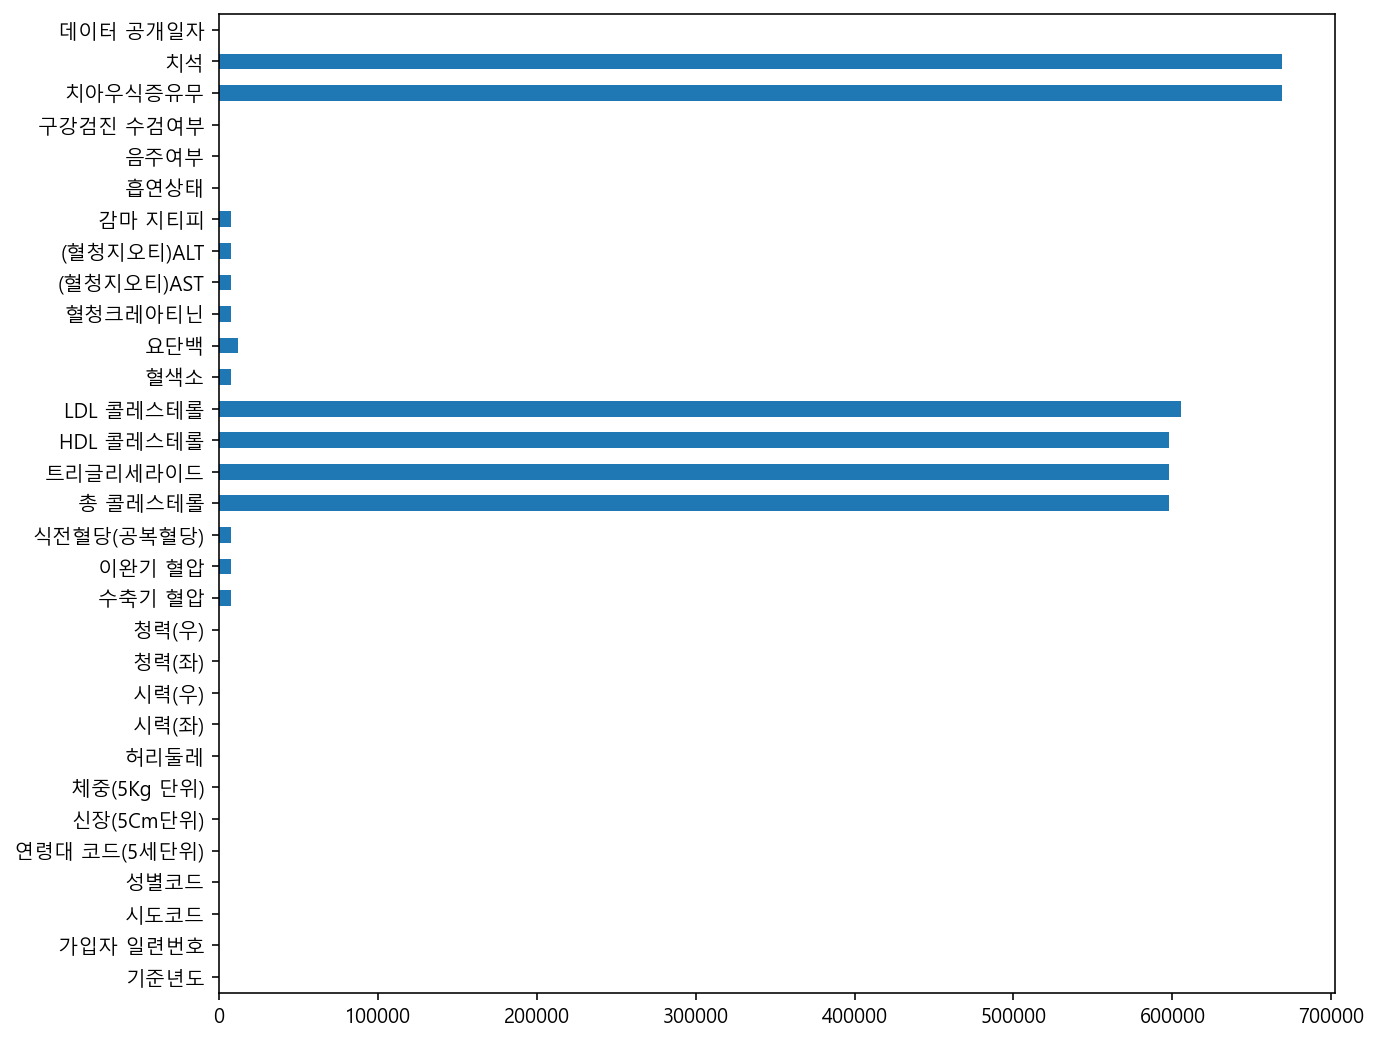

In [16]:
df.isnull().sum().plot.barh(figsize=(10, 9)) # 결측치들을 .plot 명령어를 사용해 그래프로 표현

### 일부 데이터 요약하기

In [17]:
df[["(혈청지오티)ALT", "(혈청지오티)AST"]].head() # 데이터프레임명['불러올컬럼명'] 을 이용해 특정 컬럼만 불러올 수 있다

,(혈청지오티)ALT,(혈청지오티)AST
0,27.0,21.0
1,15.0,18.0
2,25.0,27.0
3,97.0,65.0
4,17.0,18.0


In [18]:
df[["(혈청지오티)ALT", "(혈청지오티)AST"]].describe() # .describe()함수를 이용해 값들을 요약하여 출력

,(혈청지오티)ALT,(혈청지오티)AST
count,992398.000000,992399.000000
mean,26.759641,27.698337
std,25.835091,25.286659
min,1.000000,1.000000
25%,16.000000,20.000000
50%,21.000000,24.000000
75%,31.000000,30.000000
max,5990.000000,8712.000000


### value_counts 로 값 집계하기

In [19]:
df["성별코드"].value_counts()  # .value_counts() 명령어를 이용해 지정된 열의 각 값에 대한 모든 발생횟수를 반환

1    510689
2    489311
Name: 성별코드, dtype: int64

In [20]:
df["흡연상태"].value_counts()

1.0    626138
2.0    189808
3.0    183711
Name: 흡연상태, dtype: int64

### groupby 와 pivot_table 사용하기

#### groupby

In [21]:
df["가입자 일련번호"].count()

1000000

In [22]:
df.groupby(["성별코드"])["가입자 일련번호"].count()

성별코드
1    510689
2    489311
Name: 가입자 일련번호, dtype: int64

In [23]:
# 성별코드와 음주여부로 그룹화를 하고 갯수 세기
df.groupby(["성별코드", "음주여부"])["가입자 일련번호"].count()

성별코드  음주여부
1     0.0     131844
      1.0     378767
2     0.0     283275
      1.0     205918
Name: 가입자 일련번호, dtype: int64

In [24]:
# 성별코드와 음주여부로 그룹화를 하고 감마지티피의 평균 구하기
df.groupby(["성별코드", "음주여부"])["감마 지티피"].mean()

성별코드  음주여부
1     0.0     34.212195
      1.0     55.059597
2     0.0     24.177603
      1.0     26.728777
Name: 감마 지티피, dtype: float64

In [25]:
# 성별코드와 음주여부로 그룹화를 하고 감마지티피의 요약수치
df.groupby(["성별코드", "음주여부"])["감마 지티피"].describe()

count       mean        std  min   25%   50%   75%     max
성별코드 음주여부                                                               
1    0.0   130103.0  34.212195  38.533470  1.0  18.0  25.0  37.0  1731.0
     1.0   377769.0  55.059597  69.135224  1.0  24.0  36.0  60.0  2630.0
2    0.0   279033.0  24.177603  26.897676  1.0  14.0  18.0  26.0   999.0
     1.0   205296.0  26.728777  36.415153  1.0  14.0  18.0  27.0   999.0

In [26]:
df.groupby(["성별코드", "음주여부"])["감마 지티피"].agg(["count", "mean", "median"])#.agg([]) 명령어를 이용해 describe중 원하는값만 출력

count       mean  median
성별코드 음주여부                           
1    0.0   130103  34.212195    25.0
     1.0   377769  55.059597    36.0
2    0.0   279033  24.177603    18.0
     1.0   205296  26.728777    18.0

#### pivot_table
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html

In [27]:
df.pivot_table(index="음주여부", values="가입자 일련번호", aggfunc="count") # pivot_table 이용하여 집계가능, 
                                                                            # aggfunc에 산식을 넣을 수 있다

,가입자 일련번호
음주여부,
0.0,415119
1.0,584685


In [28]:
pd.pivot_table(df, index="음주여부", values="감마 지티피", aggfunc='mean')

,감마 지티피
음주여부,
0.0,27.368548
1.0,45.084373


In [29]:
pd.pivot_table(df, index="음주여부", values="감마 지티피", 
               aggfunc=["mean", "median"])

,mean,median
,감마 지티피,감마 지티피
음주여부,,
0.0,27.368548,20.0
1.0,45.084373,28.0


In [30]:
pd.pivot_table(df, index="음주여부", values="감마 지티피", 
               aggfunc="describe")

,25%,50%,75%,count,max,mean,min,std
음주여부,,,,,,,,
0.0,15.0,20.0,30.0,409136.0,1731.0,27.368548,1.0,31.423282
1.0,18.0,28.0,48.0,583065.0,2630.0,45.084373,1.0,61.210826


In [31]:
pd.pivot_table(df, index=["성별코드", "음주여부"], values="감마 지티피", 
               aggfunc="describe")

25%   50%   75%     count     max       mean  min        std
성별코드 음주여부                                                               
1    0.0   18.0  25.0  37.0  130103.0  1731.0  34.212195  1.0  38.533470
     1.0   24.0  36.0  60.0  377769.0  2630.0  55.059597  1.0  69.135224
2    0.0   14.0  18.0  26.0  279033.0   999.0  24.177603  1.0  26.897676
     1.0   14.0  18.0  27.0  205296.0   999.0  26.728777  1.0  36.415153

### 전체 데이터 시각화 하기

#### 히스토그램

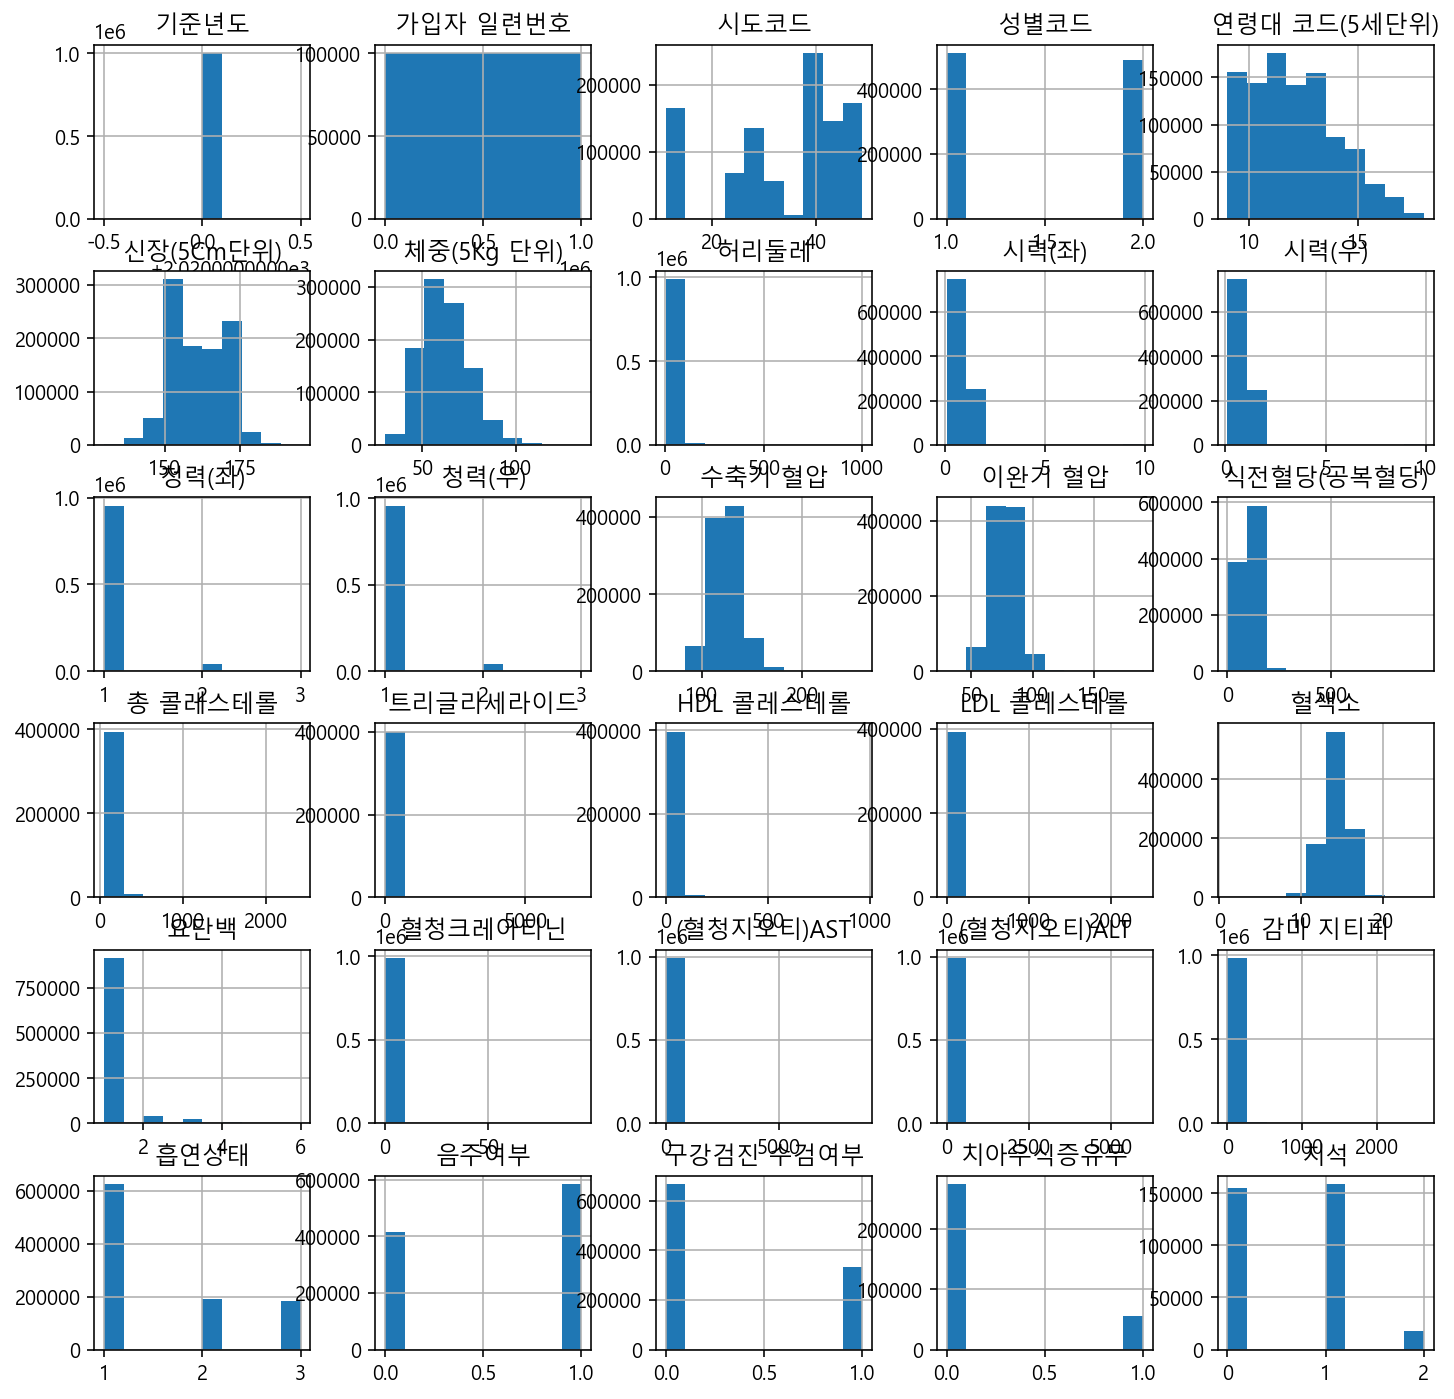

In [32]:
h = df.hist(figsize=(12, 12))

#### 슬라이싱을 사용해 히스토그램 그리기

In [82]:
df.iloc[:12, :12] # [:n ,:n] -> n 개 컬럼값과 n 개 데이터만 출력

,기준년도,가입자 일련번호,시도코드,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우)
0,2020,1,36,1,9,165,60,72.1,1.2,1.5,1.0,1.0
1,2020,2,27,2,13,150,65,81.0,0.8,0.8,1.0,1.0
2,2020,3,11,2,12,155,55,70.0,0.6,0.7,1.0,1.0
3,2020,4,31,1,13,160,70,90.8,1.0,1.0,1.0,2.0
4,2020,5,41,2,12,155,50,75.2,1.5,1.2,1.0,1.0
5,2020,6,27,1,9,185,85,94.0,1.2,1.2,1.0,1.0
6,2020,7,44,1,9,165,80,93.0,0.8,0.7,1.0,2.0
7,2020,8,41,1,13,160,65,92.0,0.5,0.5,1.0,1.0
8,2020,9,41,2,17,150,50,82.0,0.4,0.5,2.0,2.0
9,2020,10,48,2,14,150,45,71.2,0.8,0.7,2.0,1.0


In [34]:
df

,기준년도,가입자 일련번호,시도코드,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,치석,데이터 공개일자
0,2020,1,36,1,9,165,60,72.1,1.2,1.5,...,1.1,21.0,27.0,21.0,1.0,0.0,0,NaN,NaN,2021-12-29
1,2020,2,27,2,13,150,65,81.0,0.8,0.8,...,0.5,18.0,15.0,15.0,1.0,0.0,0,NaN,NaN,2021-12-29
2,2020,3,11,2,12,155,55,70.0,0.6,0.7,...,0.7,27.0,25.0,7.0,1.0,0.0,0,NaN,NaN,2021-12-29
3,2020,4,31,1,13,160,70,90.8,1.0,1.0,...,1.2,65.0,97.0,72.0,1.0,0.0,1,0.0,0.0,2021-12-29
4,2020,5,41,2,12,155,50,75.2,1.5,1.2,...,0.7,18.0,17.0,14.0,1.0,0.0,0,NaN,NaN,2021-12-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2020,999996,41,2,13,145,55,81.0,0.9,1.0,...,0.6,21.0,25.0,18.0,1.0,0.0,0,NaN,NaN,2021-12-29
999996,2020,999997,26,2,12,160,55,76.5,1.5,1.5,...,0.8,21.0,14.0,19.0,1.0,1.0,0,NaN,NaN,2021-12-29
999997,2020,999998,48,1,9,175,70,85.0,1.2,1.2,...,0.9,26.0,20.0,17.0,1.0,1.0,0,NaN,NaN,2021-12-29
999998,2020,999999,48,2,9,160,70,91.0,0.6,0.5,...,1.0,25.0,29.0,13.0,1.0,0.0,0,NaN,NaN,2021-12-29


In [35]:
df.iloc[:, :12] # 12개 컬럼값만 출력

,기준년도,가입자 일련번호,시도코드,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우)
0,2020,1,36,1,9,165,60,72.1,1.2,1.5,1.0,1.0
1,2020,2,27,2,13,150,65,81.0,0.8,0.8,1.0,1.0
2,2020,3,11,2,12,155,55,70.0,0.6,0.7,1.0,1.0
3,2020,4,31,1,13,160,70,90.8,1.0,1.0,1.0,2.0
4,2020,5,41,2,12,155,50,75.2,1.5,1.2,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2020,999996,41,2,13,145,55,81.0,0.9,1.0,1.0,1.0
999996,2020,999997,26,2,12,160,55,76.5,1.5,1.5,1.0,1.0
999997,2020,999998,48,1,9,175,70,85.0,1.2,1.2,1.0,1.0
999998,2020,999999,48,2,9,160,70,91.0,0.6,0.5,1.0,1.0


array([[<AxesSubplot:title={'center':'기준년도'}>,
        <AxesSubplot:title={'center':'가입자 일련번호'}>,
        <AxesSubplot:title={'center':'시도코드'}>],
       [<AxesSubplot:title={'center':'성별코드'}>,
        <AxesSubplot:title={'center':'연령대 코드(5세단위)'}>,
        <AxesSubplot:title={'center':'신장(5Cm단위)'}>],
       [<AxesSubplot:title={'center':'체중(5Kg 단위)'}>,
        <AxesSubplot:title={'center':'허리둘레'}>,
        <AxesSubplot:title={'center':'시력(좌)'}>],
       [<AxesSubplot:title={'center':'시력(우)'}>,
        <AxesSubplot:title={'center':'청력(좌)'}>,
        <AxesSubplot:title={'center':'청력(우)'}>]], dtype=object)

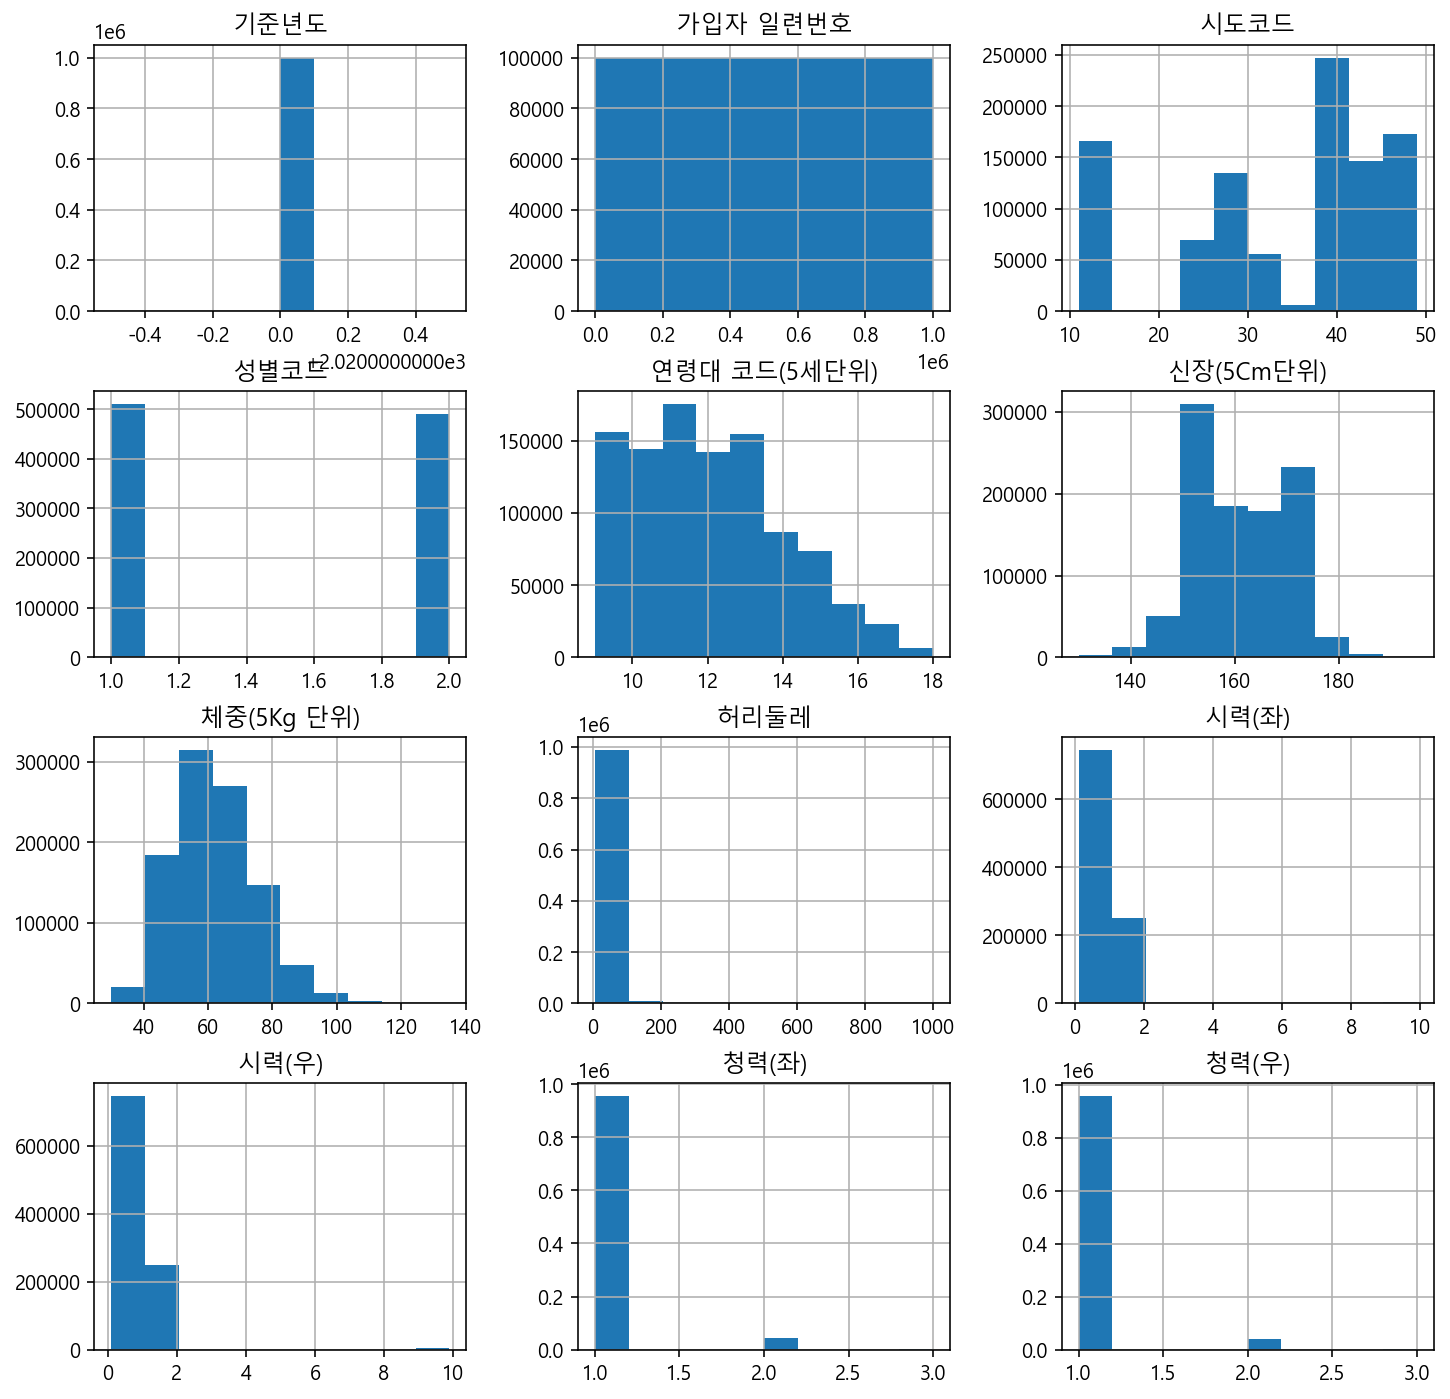

In [36]:
df.iloc[:, :12].hist(figsize=(12, 12))

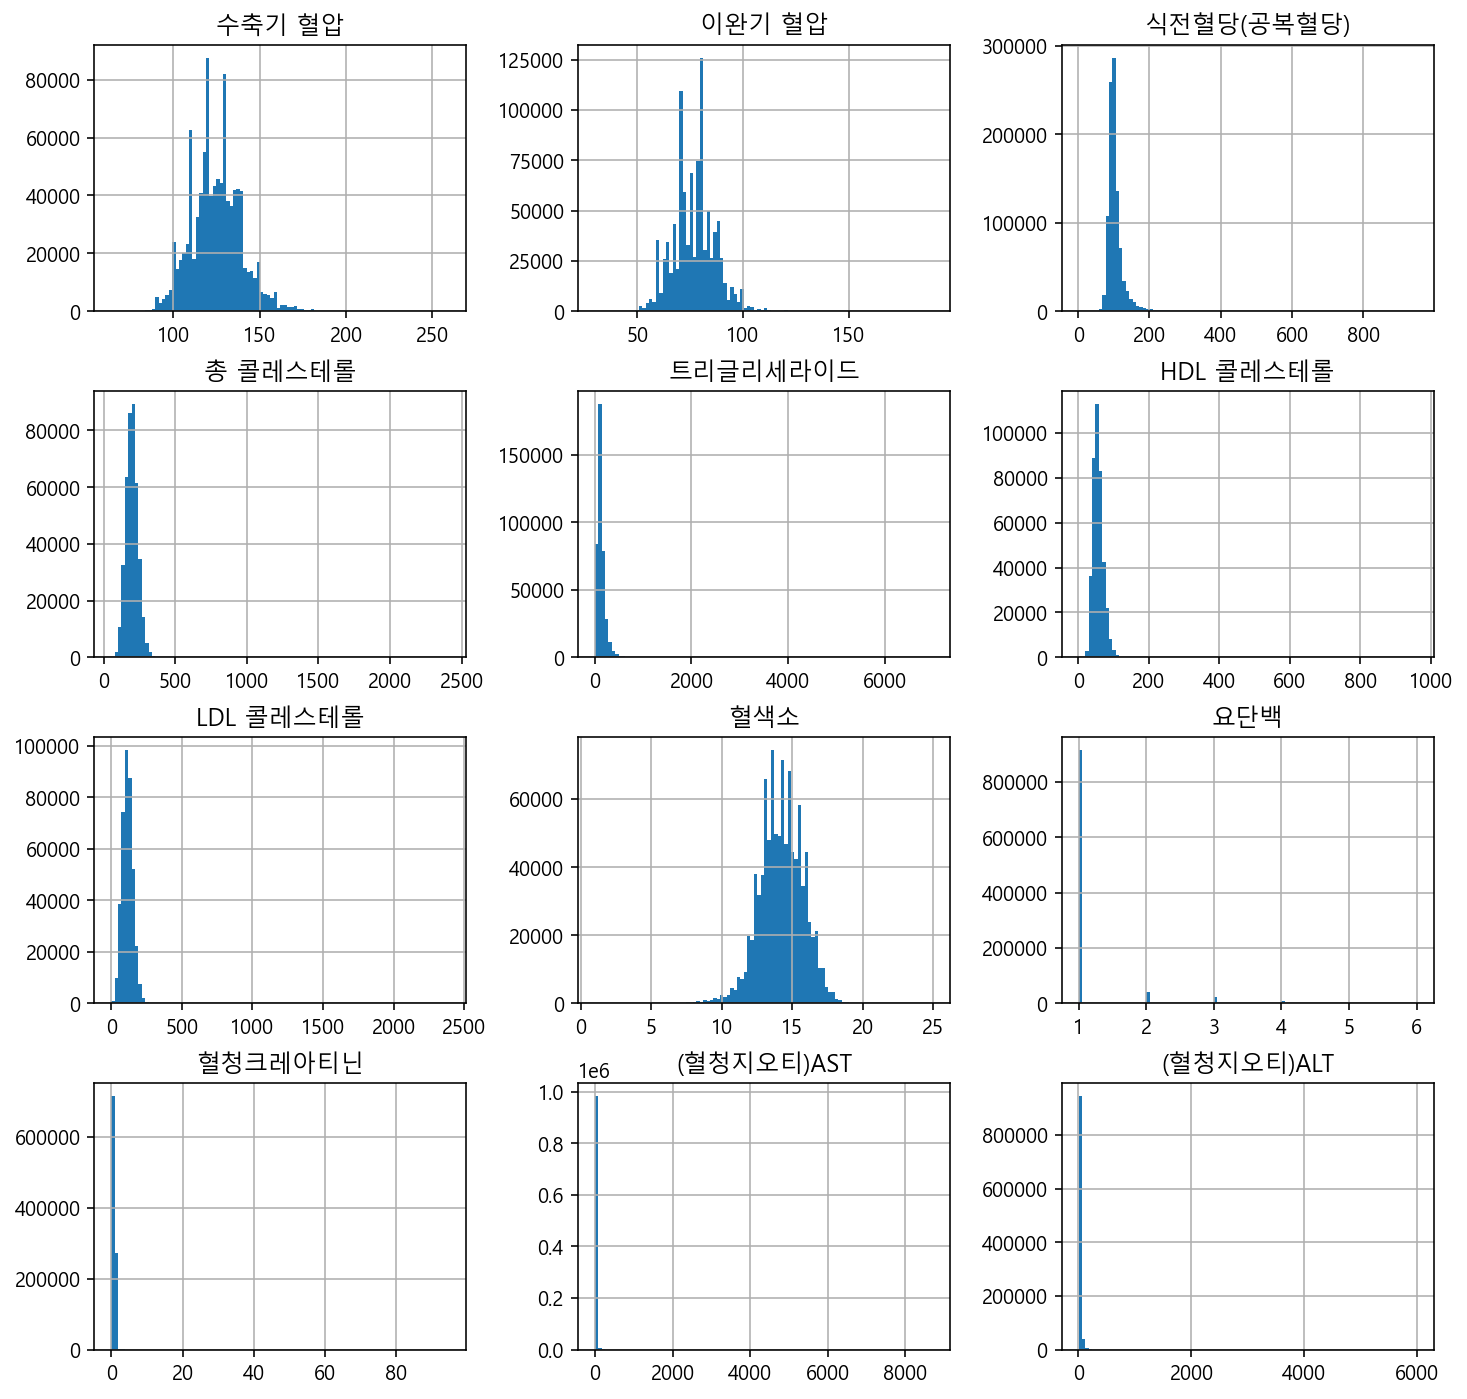

In [37]:
h = df.iloc[:, 12:24].hist(figsize=(12, 12), bins=100) # 많은 데이터를 시각화하기 어려우니, 나눠서 시각화

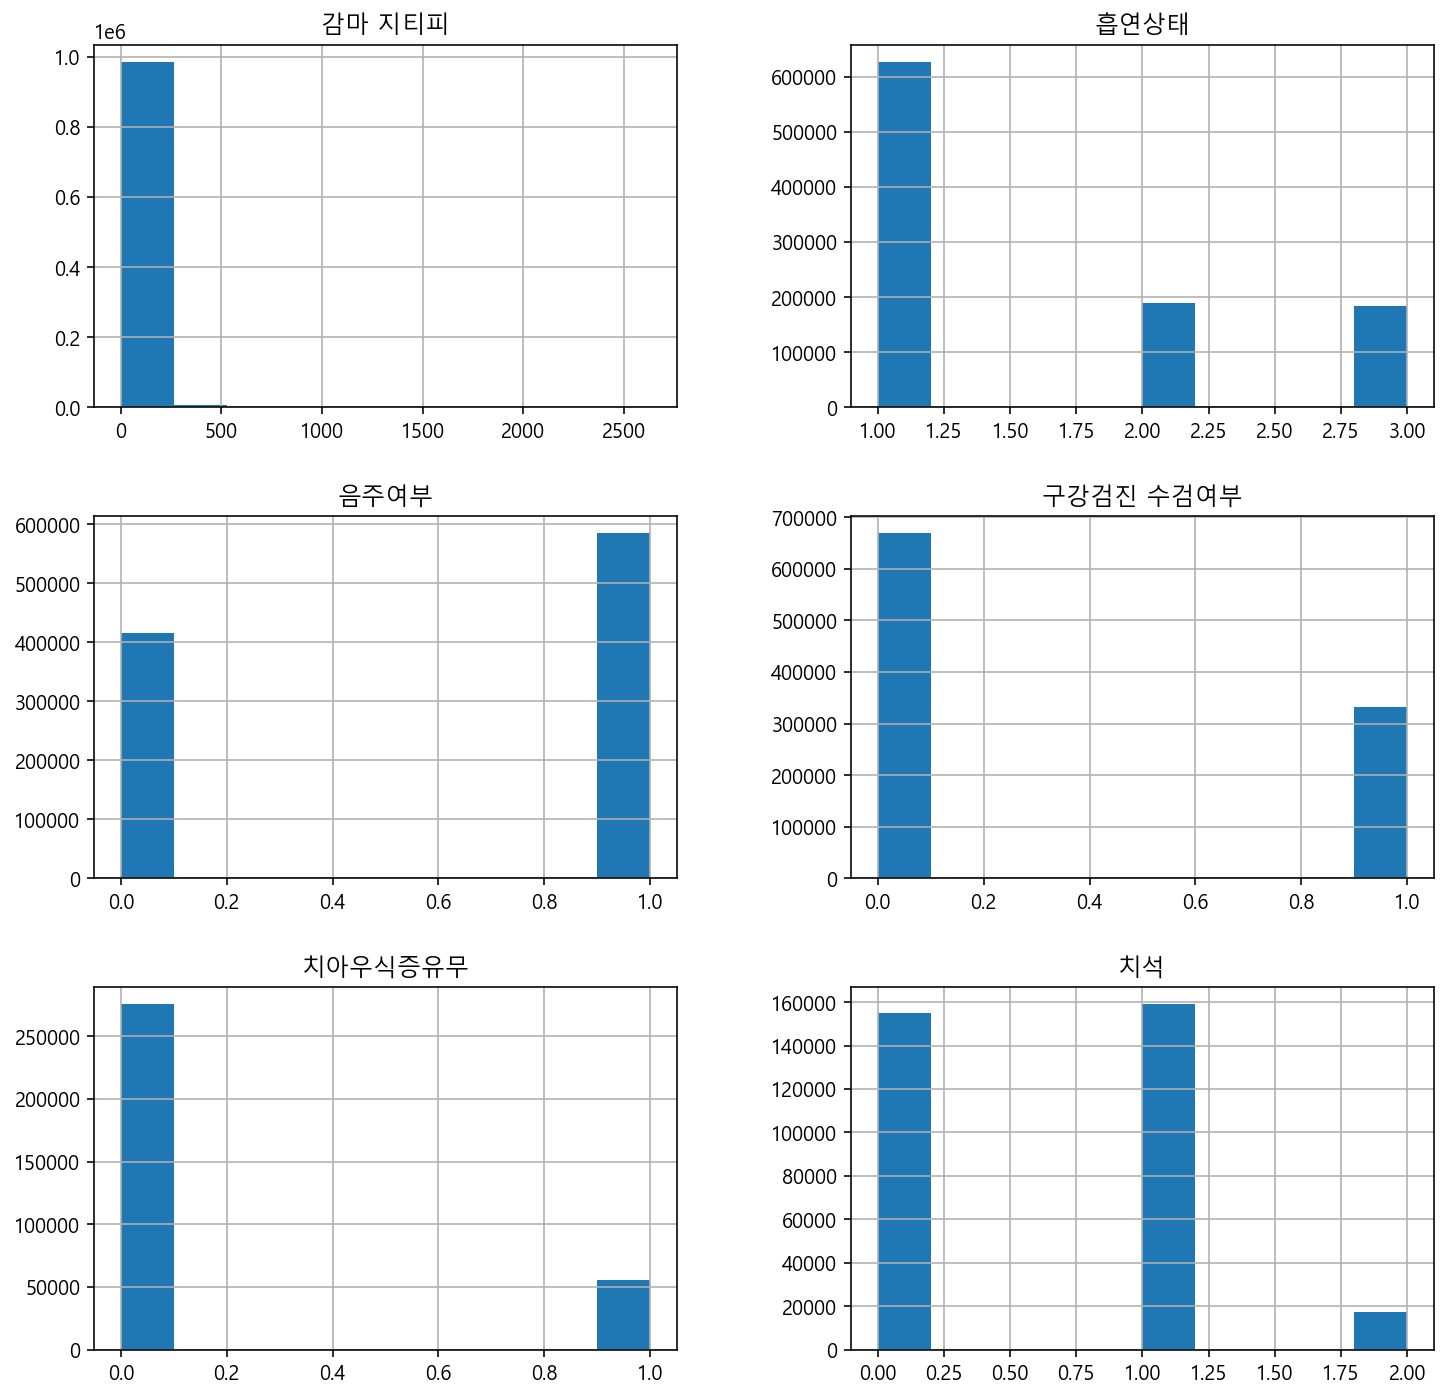

In [38]:
h = df.iloc[:, 24:].hist(figsize=(12, 12), bins=10)

### 데이터 샘플 추출

In [39]:
df_sample = df.sample(1000, random_state=1) # .sample() 함수는 무작위로 데이터 추출, random_state는 랜덤추출값에 시드 설정
df_sample.shape

(1000, 31)

### 범주형(카테고리) 데이터 시각화
* countplot : 범주형 데이터의 수를 더한 값을 그래프로 표현
* value_counts : 로 구한 값을 시각화

#### countplot - 음주여부

<AxesSubplot:>

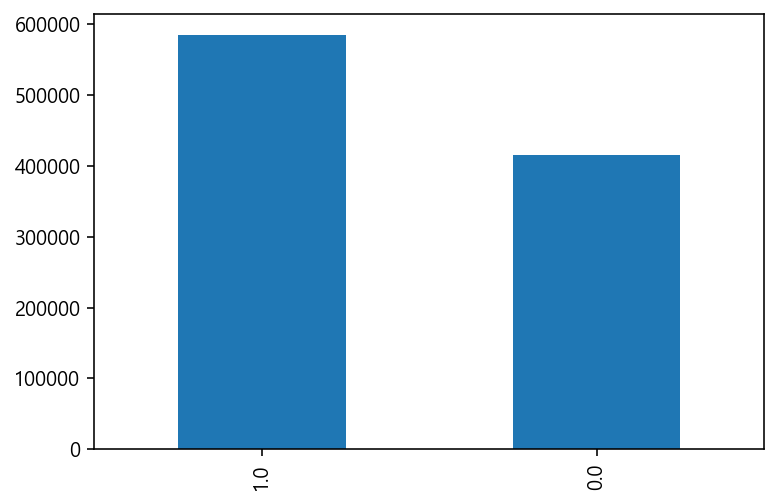

In [40]:
df["음주여부"].value_counts().plot.bar()

<AxesSubplot:xlabel='음주여부', ylabel='count'>

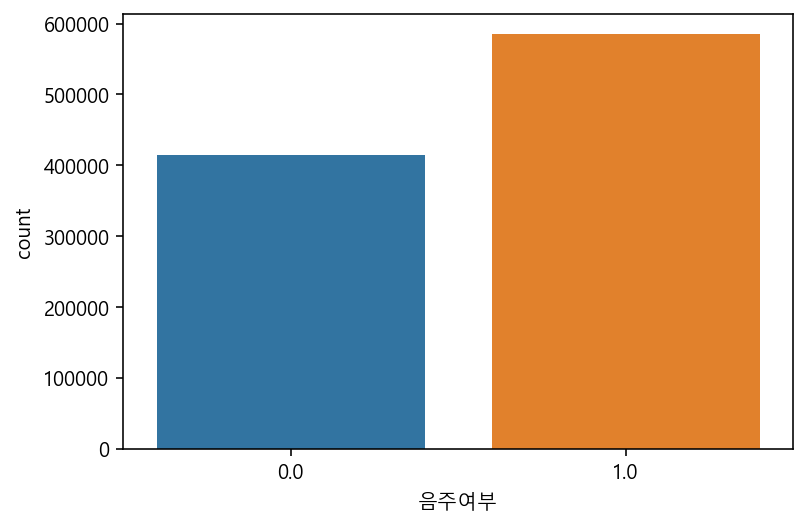

In [41]:
sns.countplot(x="음주여부", data=df)

#### hue 옵션 사용하기

<AxesSubplot:xlabel='음주여부', ylabel='count'>

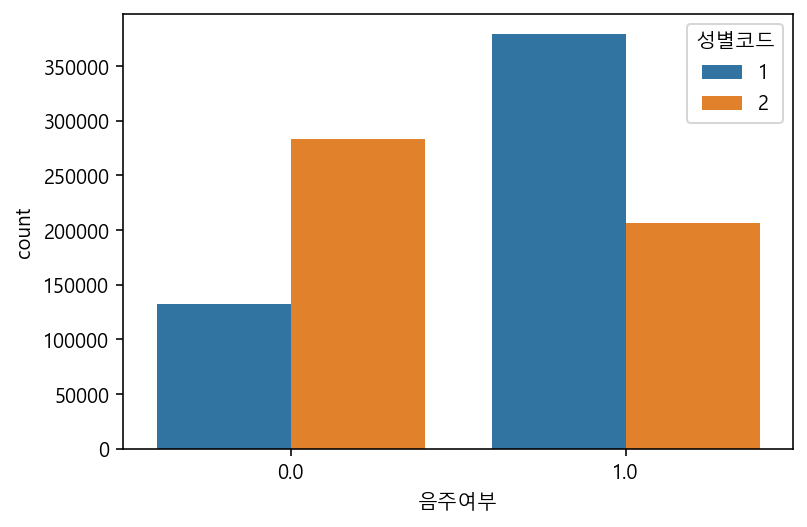

In [42]:
sns.countplot(data=df, x="음주여부", hue="성별코드") # hue 옵션을 사용해 남녀구분

In [43]:
# # countplot으로 연령대별 음주여부(hue옵션 사용)

<AxesSubplot:xlabel='연령대 코드(5세단위)', ylabel='count'>

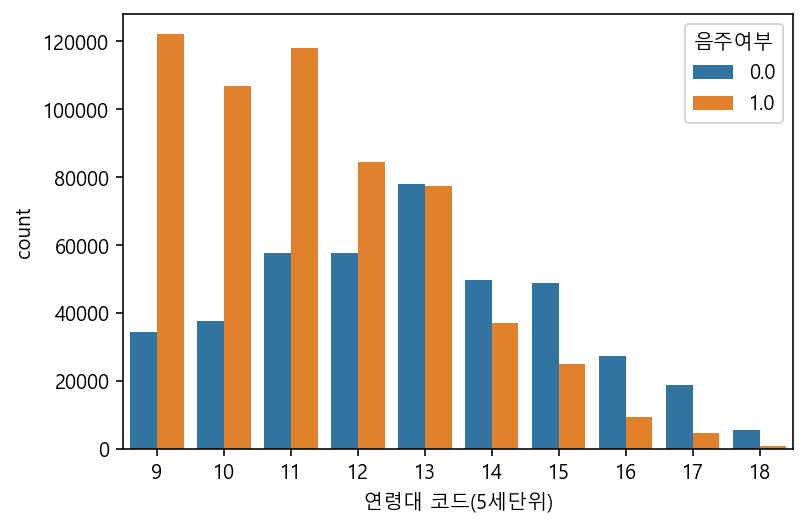

In [44]:
sns.countplot(data=df, x="연령대 코드(5세단위)", hue="음주여부")

#### countplot - 키와 몸무게

<AxesSubplot:xlabel='신장(5Cm단위)', ylabel='count'>

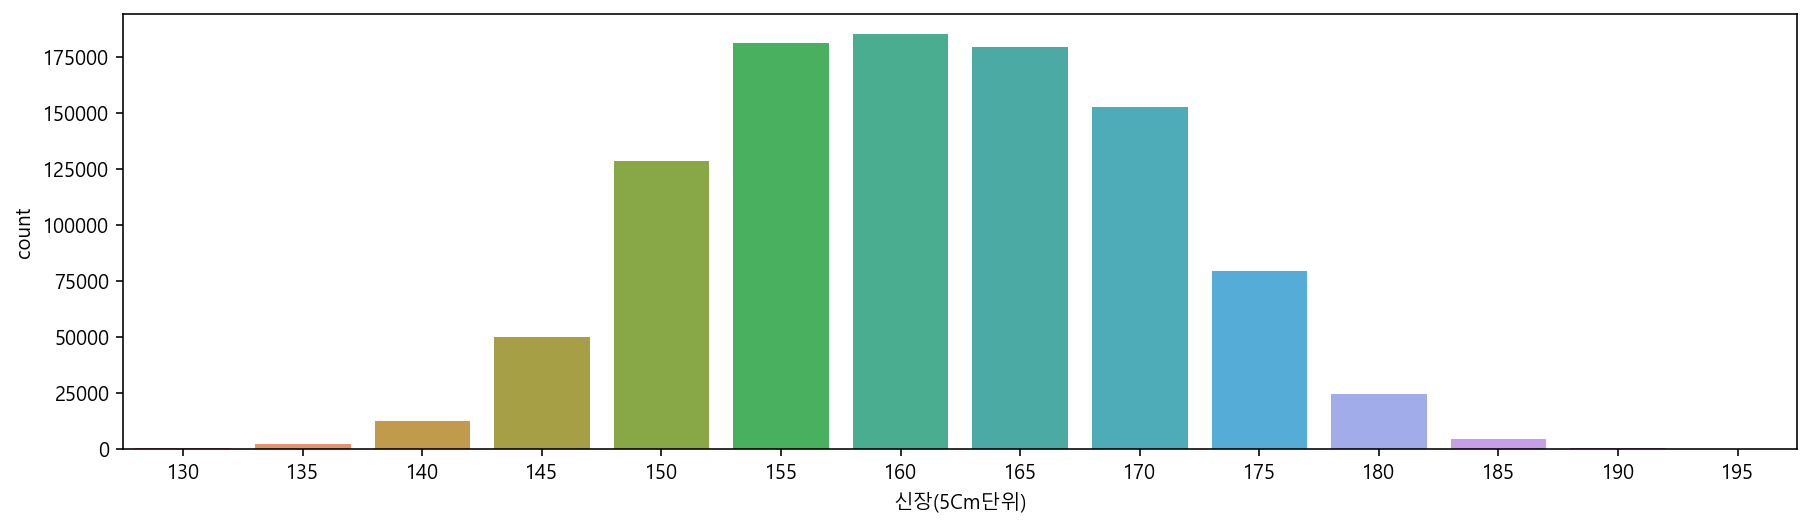

In [45]:
# counplot으로 키 확인
plt.figure(figsize=(15, 4))
sns.countplot(data=df, x="신장(5Cm단위)")

<AxesSubplot:xlabel='체중(5Kg 단위)', ylabel='count'>

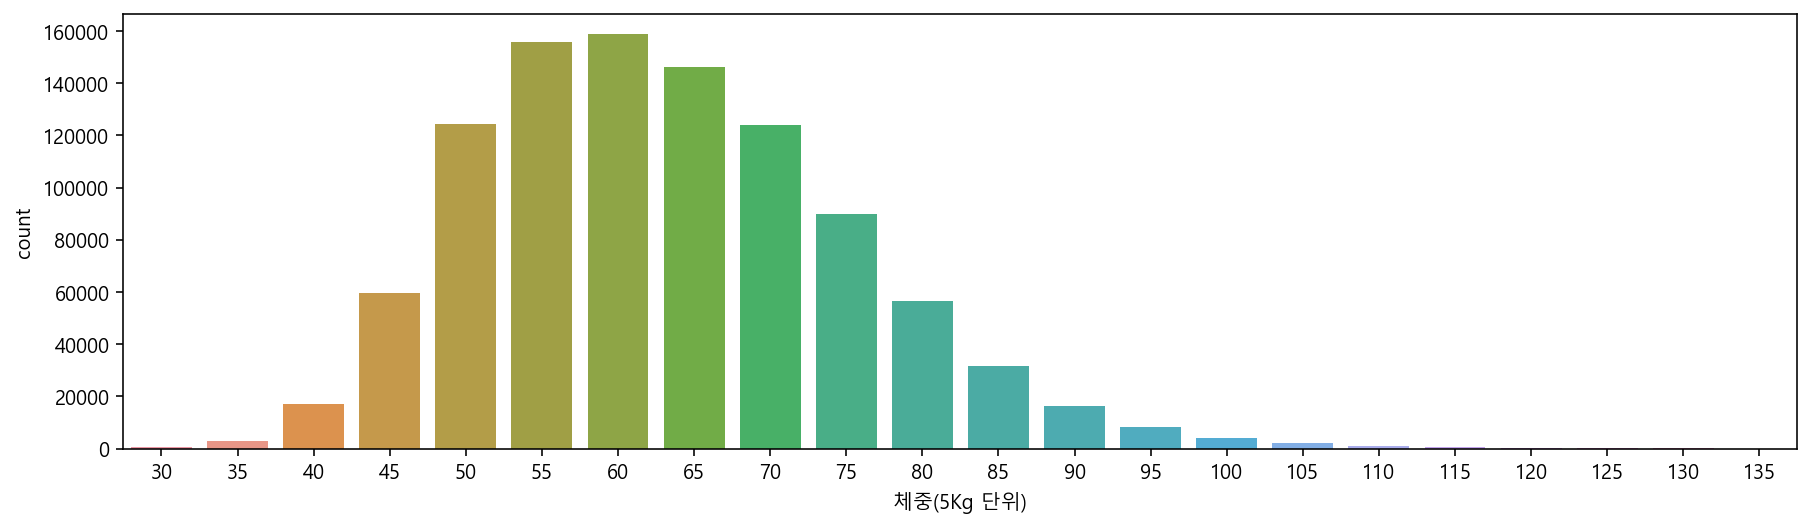

In [46]:
# counplot으로 체중 확인
plt.figure(figsize=(15, 4))
sns.countplot(data=df, x="체중(5Kg 단위)")

<AxesSubplot:xlabel='신장(5Cm단위)', ylabel='count'>

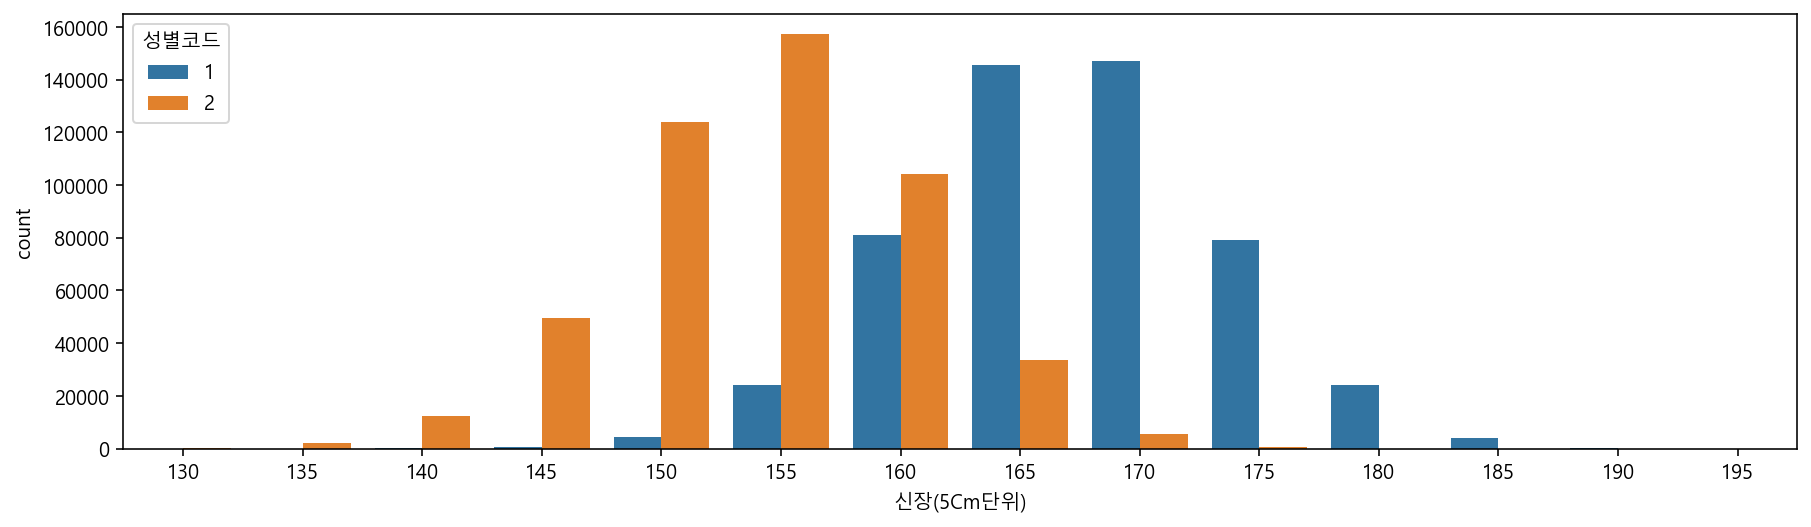

In [47]:
plt.figure(figsize=(15, 4))
sns.countplot(data=df, x="신장(5Cm단위)", hue="성별코드")

#### barplot - 수치형 vs 범주형 데이터 시각화

<AxesSubplot:xlabel='연령대 코드(5세단위)', ylabel='총 콜레스테롤'>

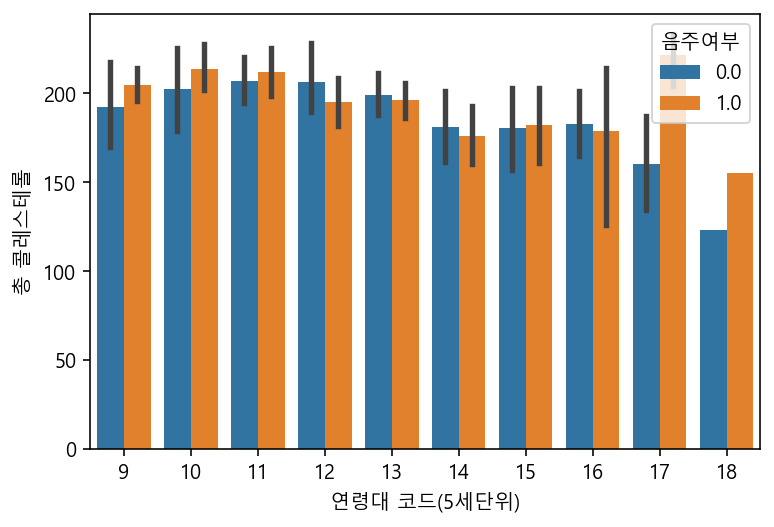

In [48]:
# 연령대코드와 총 콜레스테롤(음주여부)
sns.barplot(data=df_sample, x="연령대 코드(5세단위)", y="총 콜레스테롤", hue="음주여부")

<AxesSubplot:xlabel='연령대 코드(5세단위)', ylabel='총 콜레스테롤'>

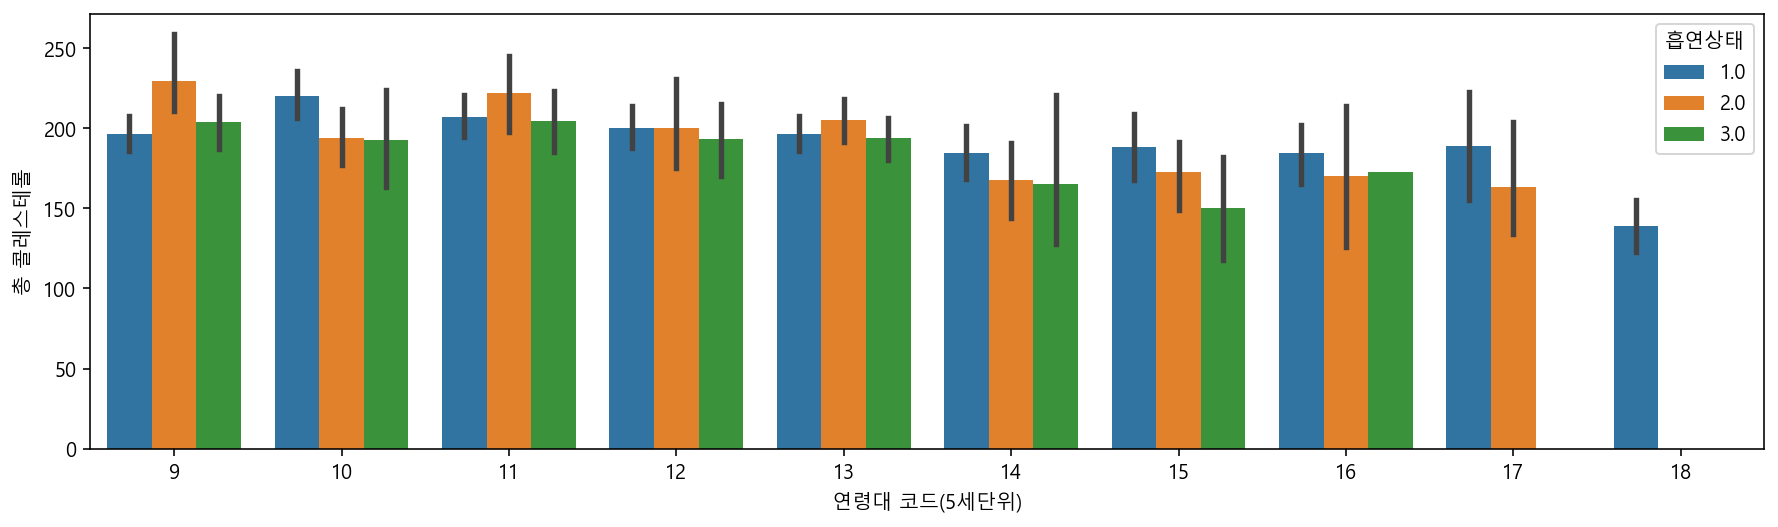

In [49]:
# 연령대코드와 총 콜레스테롤(흡연상태)
plt.figure(figsize=(15, 4))
sns.barplot(data=df_sample, x="연령대 코드(5세단위)", y="총 콜레스테롤", hue="흡연상태")

<AxesSubplot:xlabel='연령대 코드(5세단위)', ylabel='트리글리세라이드'>

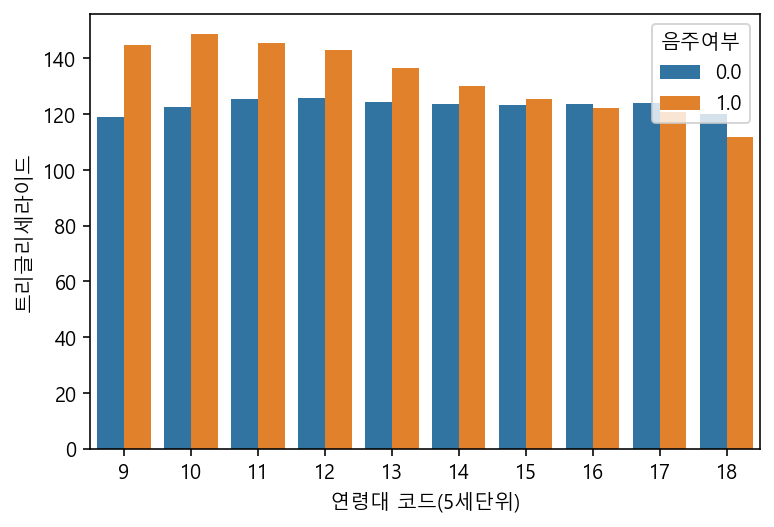

In [50]:
# 트리글리세라이드(중성지방) 에 따른 연령대코드(5세단위)-음주여부
sns.barplot(data=df, x="연령대 코드(5세단위)", y="트리글리세라이드", hue="음주여부", ci=None)
                                                                                   # ci=None 값을 이용하면 가운데 검정 바 삭제 가능

<AxesSubplot:xlabel='연령대 코드(5세단위)', ylabel='체중(5Kg 단위)'>

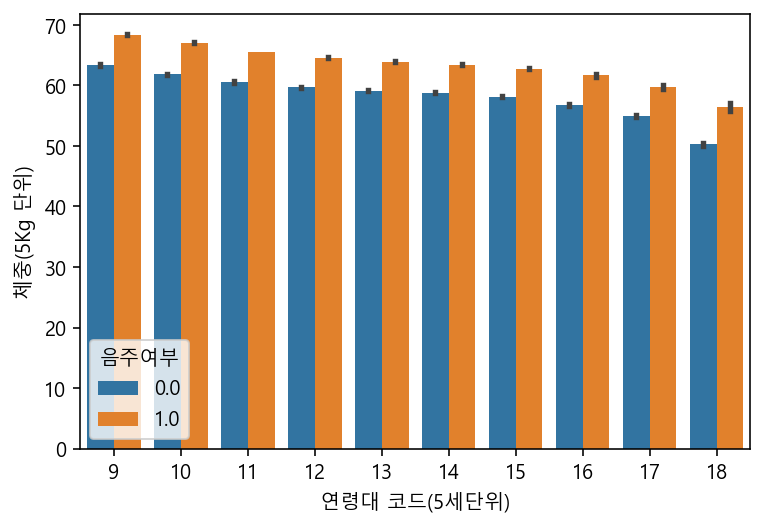

In [51]:
# 연령대코드(5세단위) 에 따른 체중(5Kg 단위)-음주여부
sns.barplot(data=df, x="연령대 코드(5세단위)", y="체중(5Kg 단위)", hue="음주여부")

#### lineplot and pointplot

<AxesSubplot:xlabel='연령대 코드(5세단위)', ylabel='체중(5Kg 단위)'>

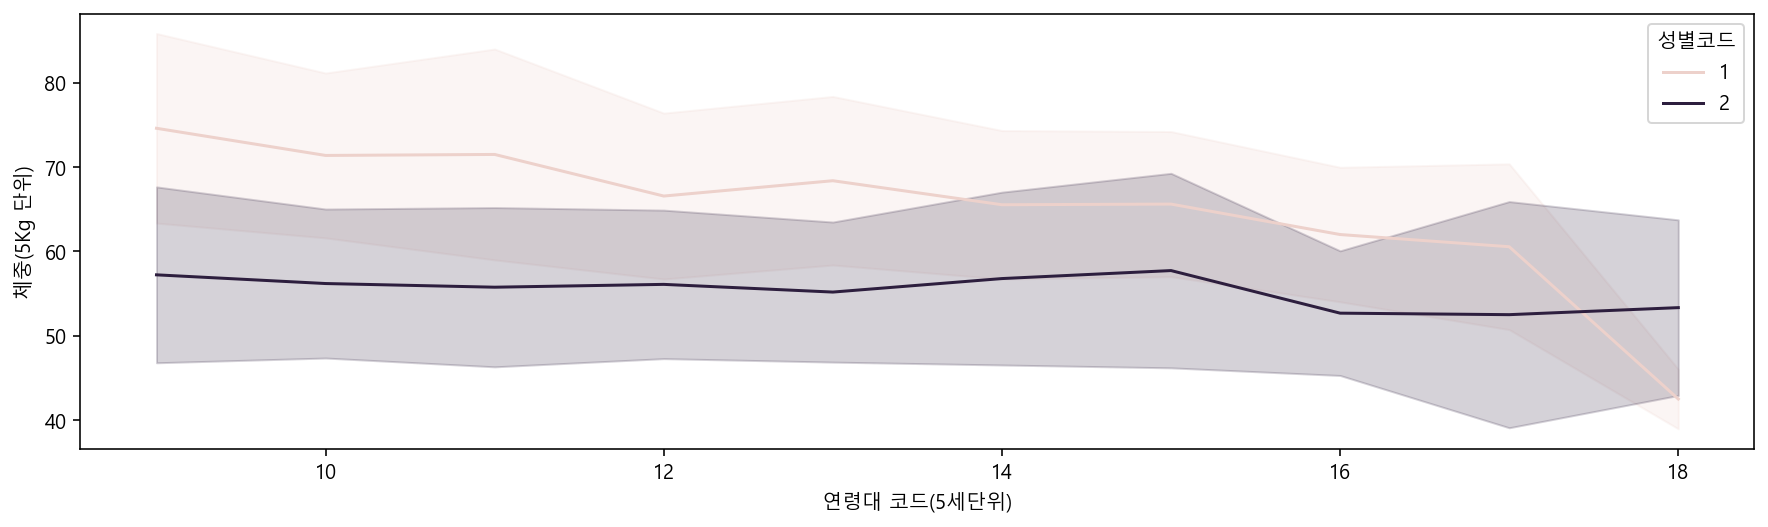

In [52]:
# 연령대코드(5세단위) 에 따른 체중(5Kg 단위)-성별코드
plt.figure(figsize=(15, 4))
sns.lineplot(data=df_sample, x="연령대 코드(5세단위)", y="체중(5Kg 단위)", hue="성별코드", ci="sd")

<AxesSubplot:xlabel='연령대 코드(5세단위)', ylabel='신장(5Cm단위)'>

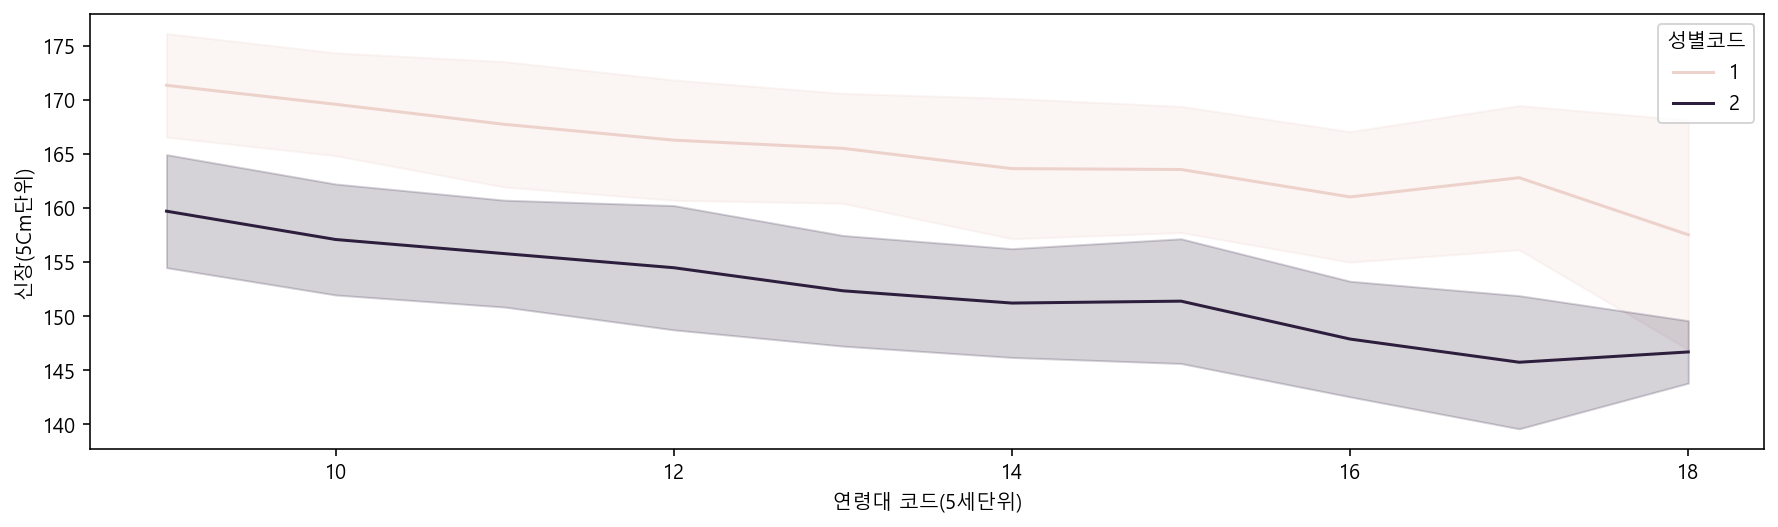

In [53]:
# 연령대코드(5세단위) 에 따른 신장(5Cm단위)-신장
plt.figure(figsize=(15, 4))
sns.lineplot(data=df_sample, x="연령대 코드(5세단위)", y="신장(5Cm단위)", hue="성별코드", ci="sd")
                                                                         # ci='sd' 사용하여 표준편차 구할 수 있음

<AxesSubplot:xlabel='연령대 코드(5세단위)', ylabel='신장(5Cm단위)'>

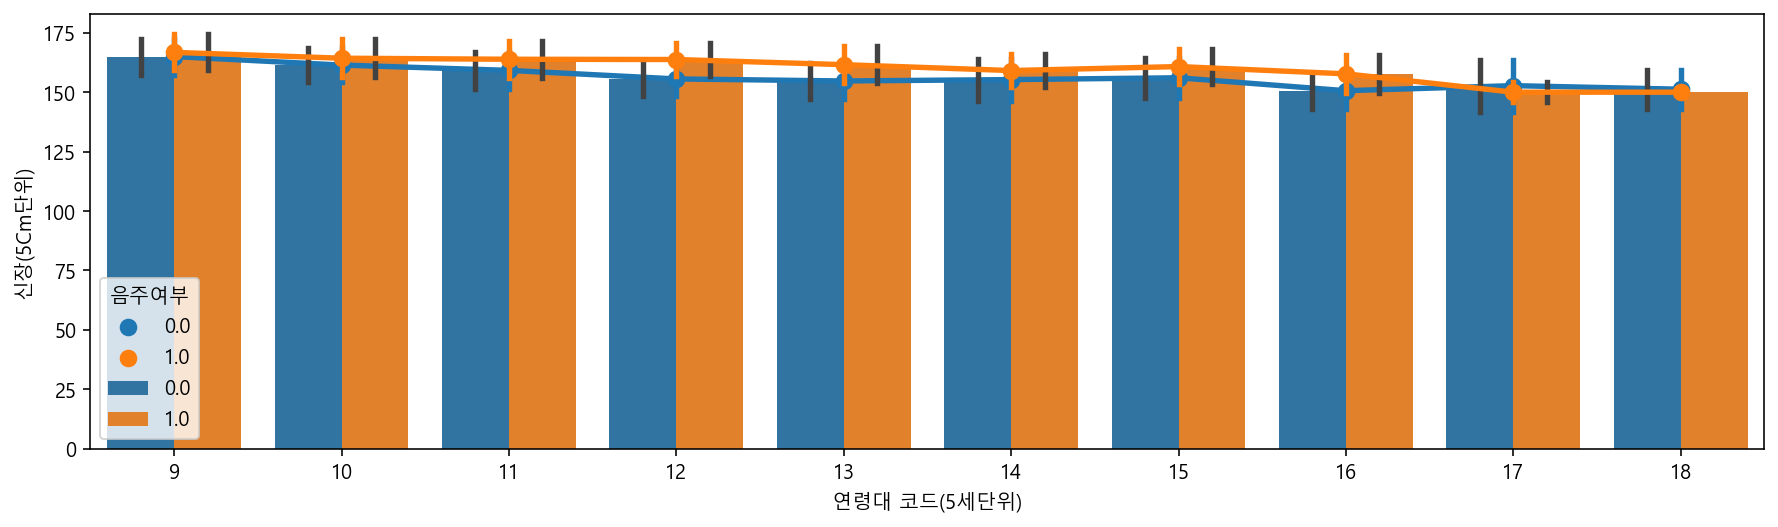

In [54]:
# 연령대코드(5세단위) 에 따른 신장(5Cm 단위) 을 음주여부에 따라 pointplot과 barplot으로 그리기
plt.figure(figsize=(15, 4))
sns.barplot(data=df_sample, x="연령대 코드(5세단위)", y="신장(5Cm단위)", hue="음주여부", ci="sd")
sns.pointplot(data=df_sample, x="연령대 코드(5세단위)", y="신장(5Cm단위)", hue="음주여부", ci="sd")

<AxesSubplot:xlabel='연령대 코드(5세단위)', ylabel='신장(5Cm단위)'>

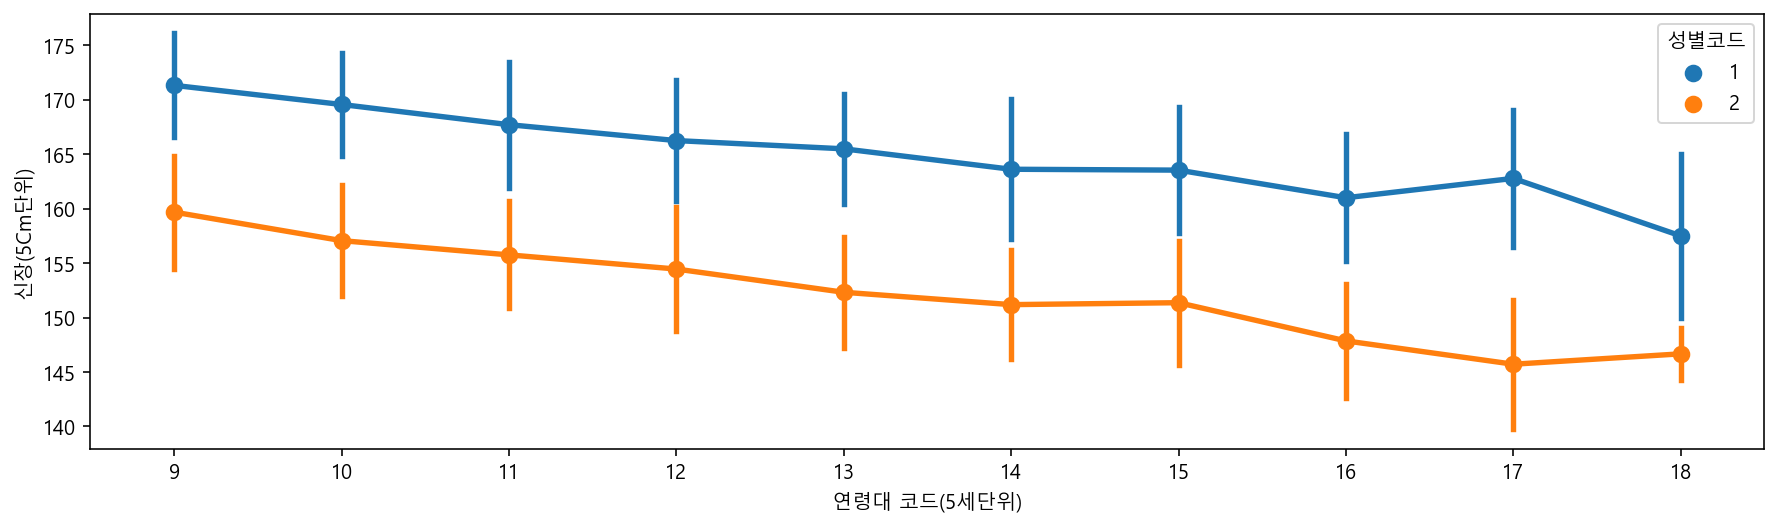

In [55]:
# 연령대코드(5세단위) 에 따른 신장(5Cm단위) 을 성별코드에 따라 pointplot으로 그리기
plt.figure(figsize=(15, 4))
sns.pointplot(data=df_sample, x="연령대 코드(5세단위)", y="신장(5Cm단위)", hue="성별코드", ci="sd")

<AxesSubplot:xlabel='연령대 코드(5세단위)', ylabel='혈색소'>

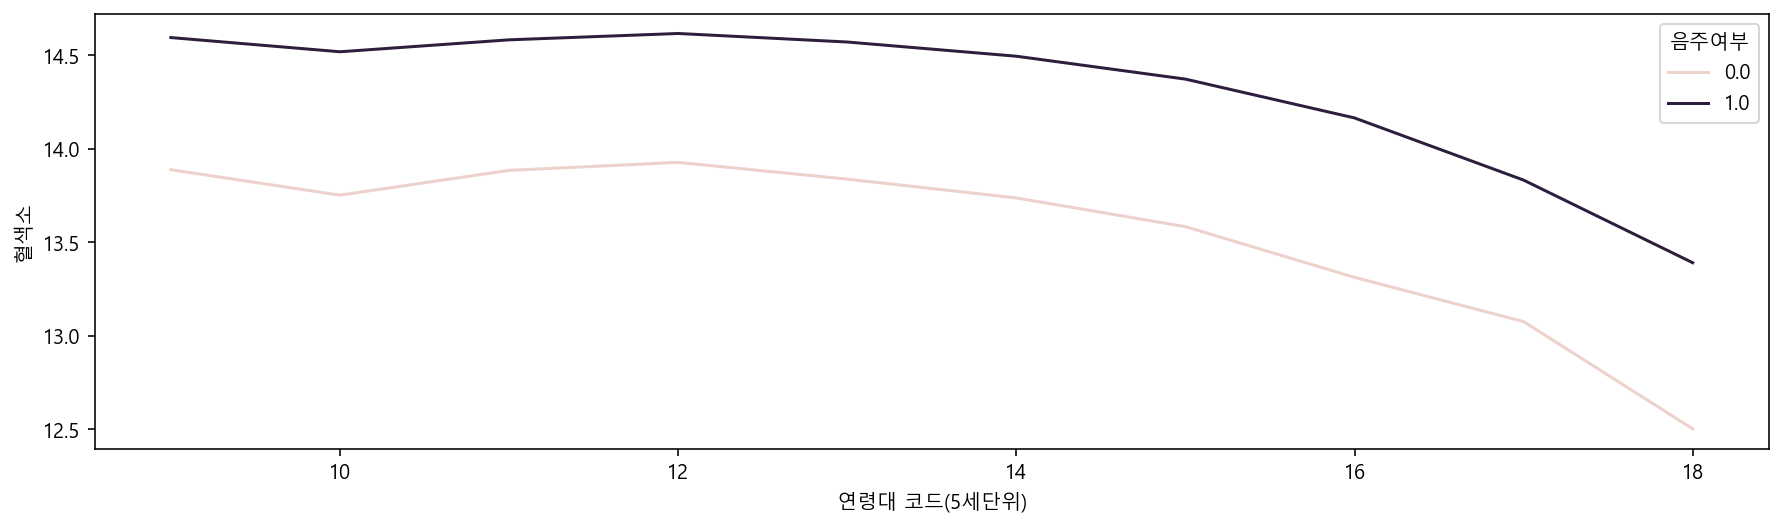

In [56]:
# 연령대코드(5세단위) 에 따른 혈색소를 음주여부에 따라 lineplot으로 그리기
plt.figure(figsize=(15, 4))
sns.lineplot(data=df, x="연령대 코드(5세단위)", y="혈색소", hue="음주여부", ci=None)

#### boxplot
* https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html

* [상자 수염 그림 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EC%83%81%EC%9E%90_%EC%88%98%EC%97%BC_%EA%B7%B8%EB%A6%BC)
* 가공하지 않은 자료 그대로를 이용하여 그린 것이 아니라, 자료로부터 얻어낸 통계량인 5가지 요약 수치로 그린다.
* 5가지 요약 수치란 기술통계학에서 자료의 정보를 알려주는 아래의 다섯 가지 수치를 의미한다.


1. 최솟값
1. 제 1사분위수
1. 제 2사분위수( ), 즉 중앙값
1. 제 3 사분위 수( )
1. 최댓값

* Box plot 이해하기 : 
    * [박스 플롯에 대하여 :: -[|]- Box and Whisker](https://boxnwhis.kr/2019/02/19/boxplot.html)
    * [Understanding Boxplots – Towards Data Science](https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51)

<AxesSubplot:xlabel='신장(5Cm단위)', ylabel='체중(5Kg 단위)'>

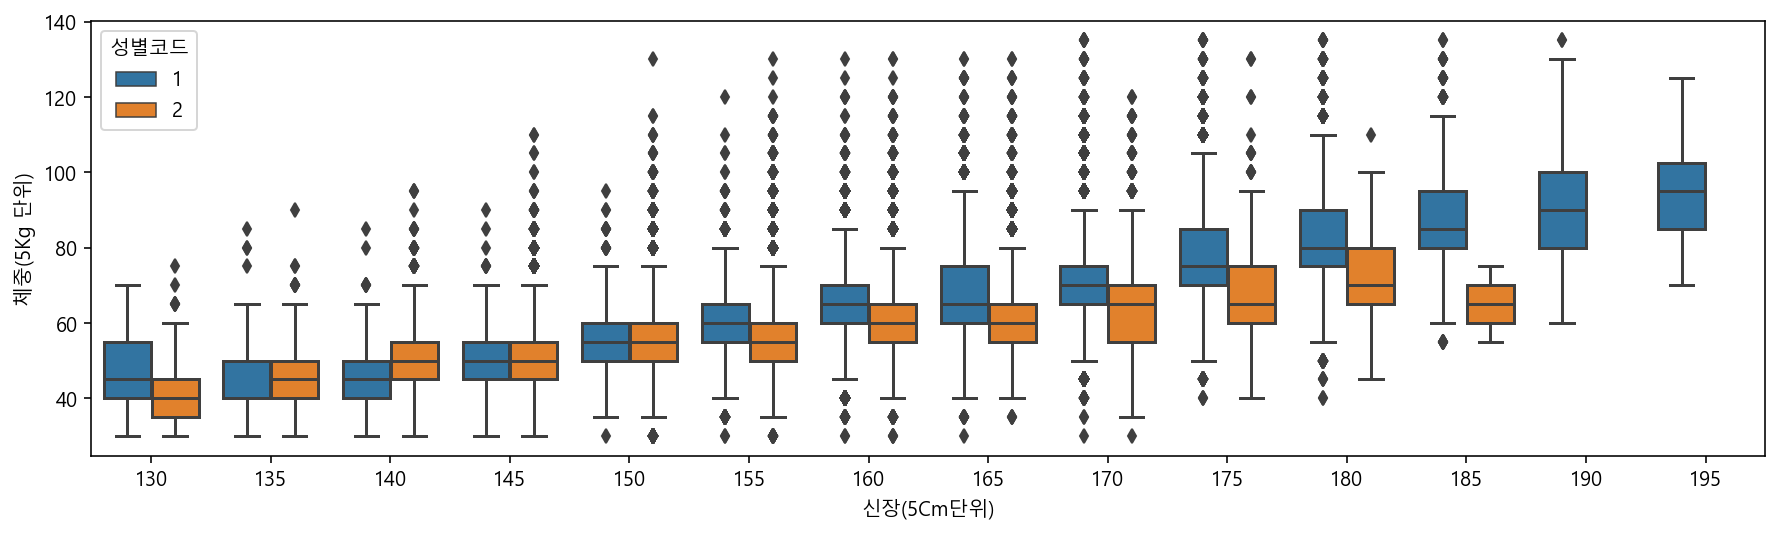

In [57]:
 # boxplot으로 신장(5Cm단위) 에 따른 체중(5Kg 단위)-성별코드에 따라 다른 색상
plt.figure(figsize=(15, 4))
sns.boxplot(data=df, x="신장(5Cm단위)", y="체중(5Kg 단위)", hue="성별코드")

#### violinplot

<AxesSubplot:xlabel='신장(5Cm단위)', ylabel='체중(5Kg 단위)'>

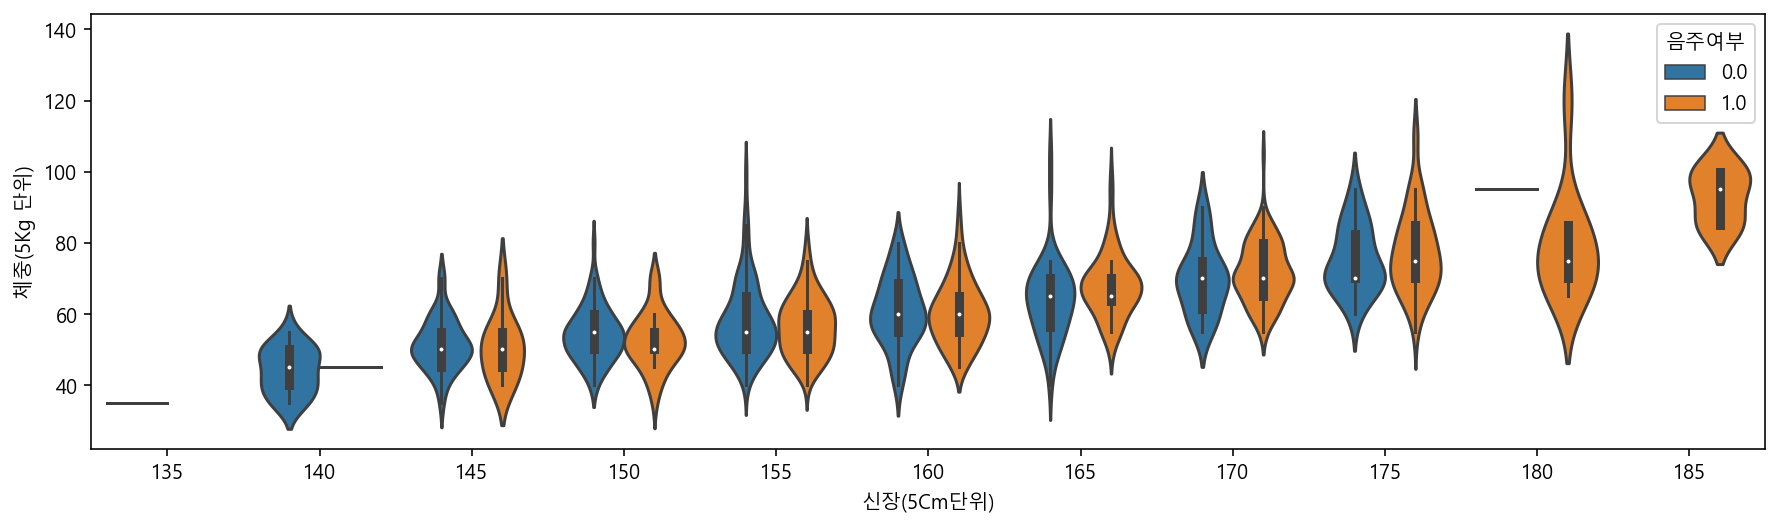

In [58]:
# # violinplot 신장(5Cm단위)에 따른 체중(5Kg 단위)-음주여부에 따라 다른 색상으로 표현
plt.figure(figsize=(15, 4))
sns.violinplot(data=df_sample, x="신장(5Cm단위)", y="체중(5Kg 단위)", hue="음주여부")

<AxesSubplot:xlabel='신장(5Cm단위)', ylabel='체중(5Kg 단위)'>

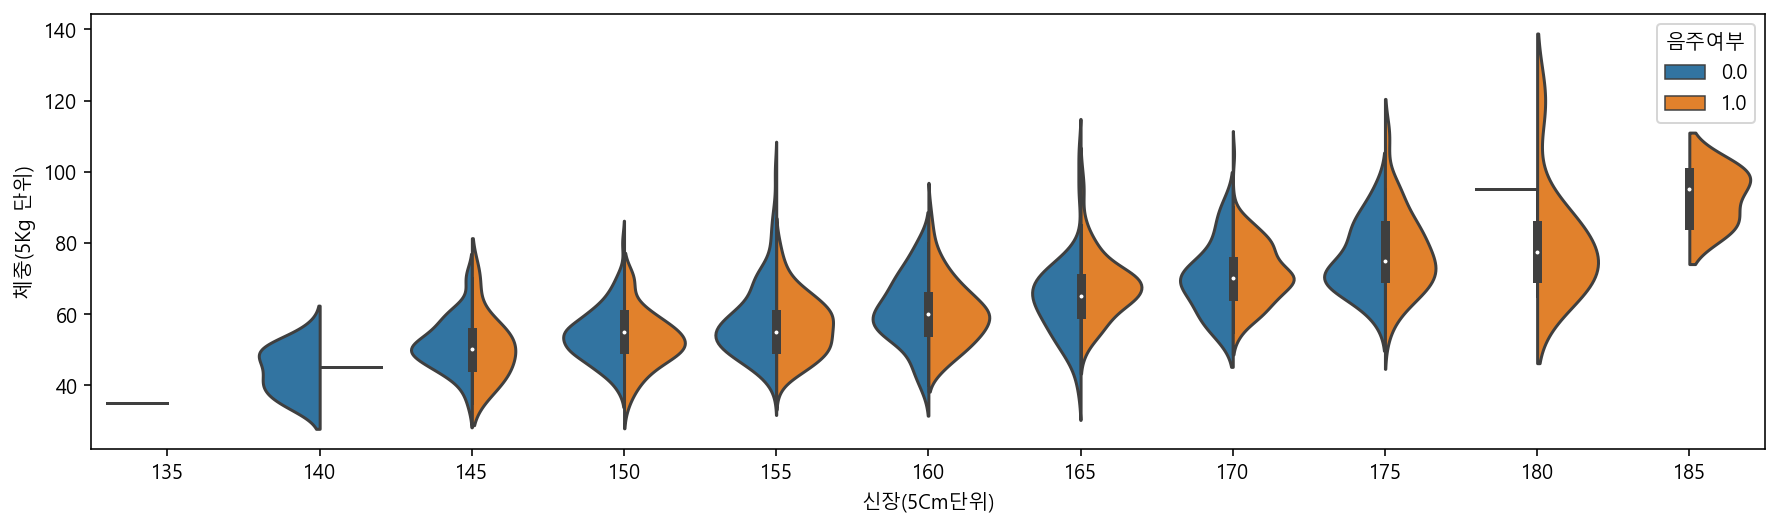

In [59]:
# split=True : 두개의 그룹을 하나의 바이올린으로 표현
plt.figure(figsize=(15, 4))
sns.violinplot(data=df_sample, x="신장(5Cm단위)", y="체중(5Kg 단위)", hue="음주여부", split=True)

<AxesSubplot:xlabel='연령대 코드(5세단위)', ylabel='혈색소'>

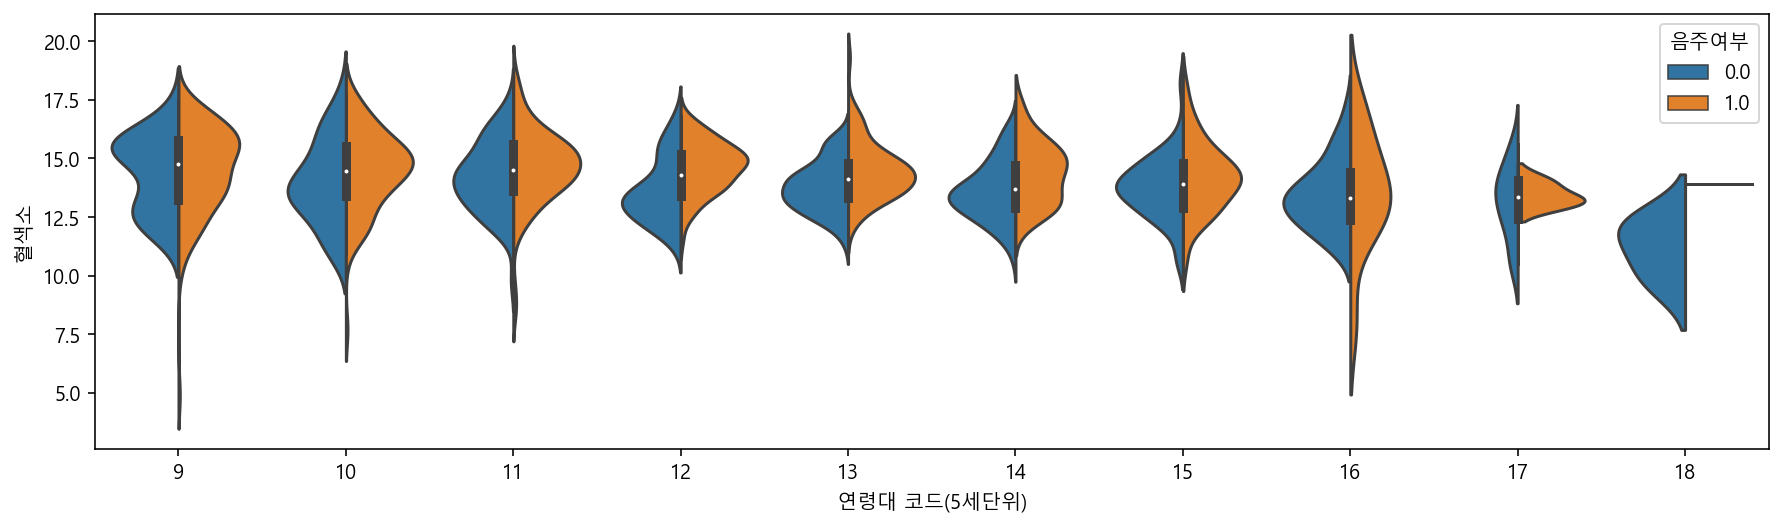

In [60]:
# violinplot 연령대코드(5세단위)에 따른 혈색소-음주여부에 따라 다른 색상으로 표현
# 혈색소남성 13.0~17.0 (10^3 또는 10³), 여성 12.0~16.0 (10^3 또는 10³)
plt.figure(figsize=(15, 4))
sns.violinplot(data=df_sample, x="연령대 코드(5세단위)", y="혈색소", hue="음주여부", split=True)

#### swarm plot
* 범주형 데이터를 산점도로 시각화

<AxesSubplot:xlabel='신장(5Cm단위)', ylabel='체중(5Kg 단위)'>

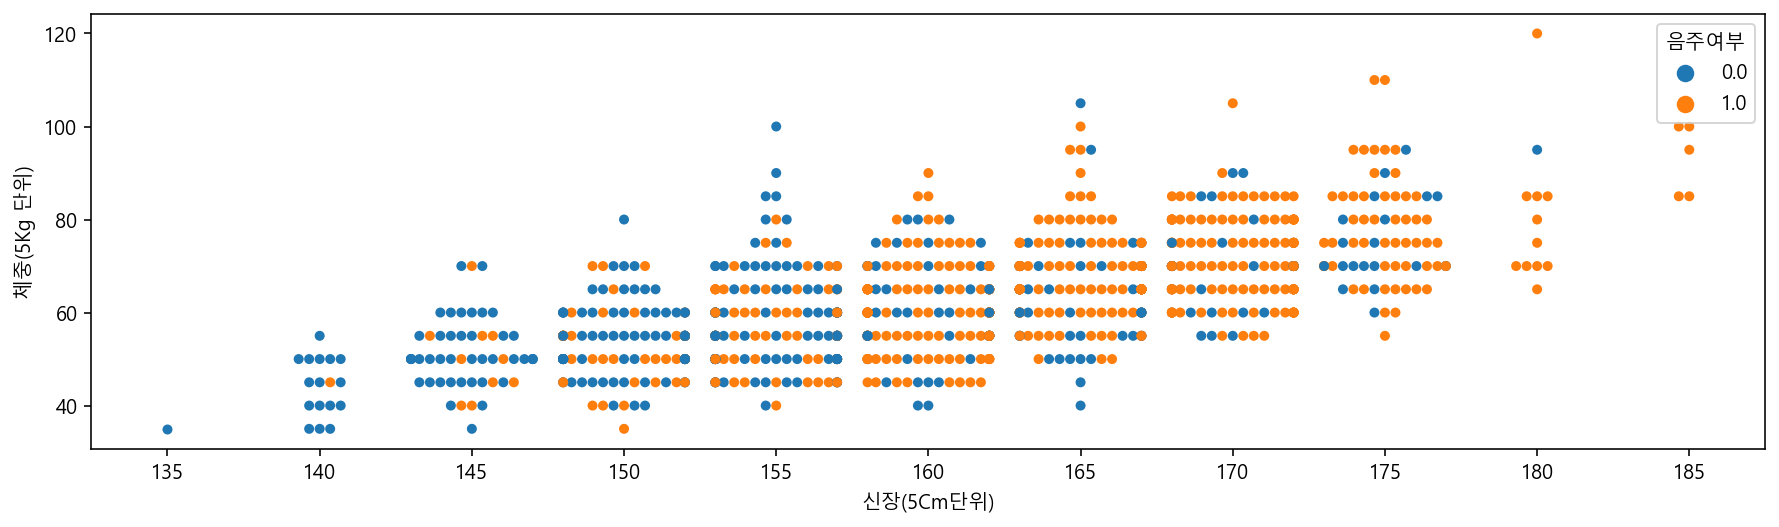

In [61]:
# swarmplot으로 신장(5Cm단위)에 따른 체중(5Kg 단위)-음주여부에 따라 다른 색상으로 표현
plt.figure(figsize=(15, 4))
sns.swarmplot(data=df_sample, x="신장(5Cm단위)", y="체중(5Kg 단위)", hue="음주여부")

<AxesSubplot:xlabel='연령대 코드(5세단위)', ylabel='혈색소'>

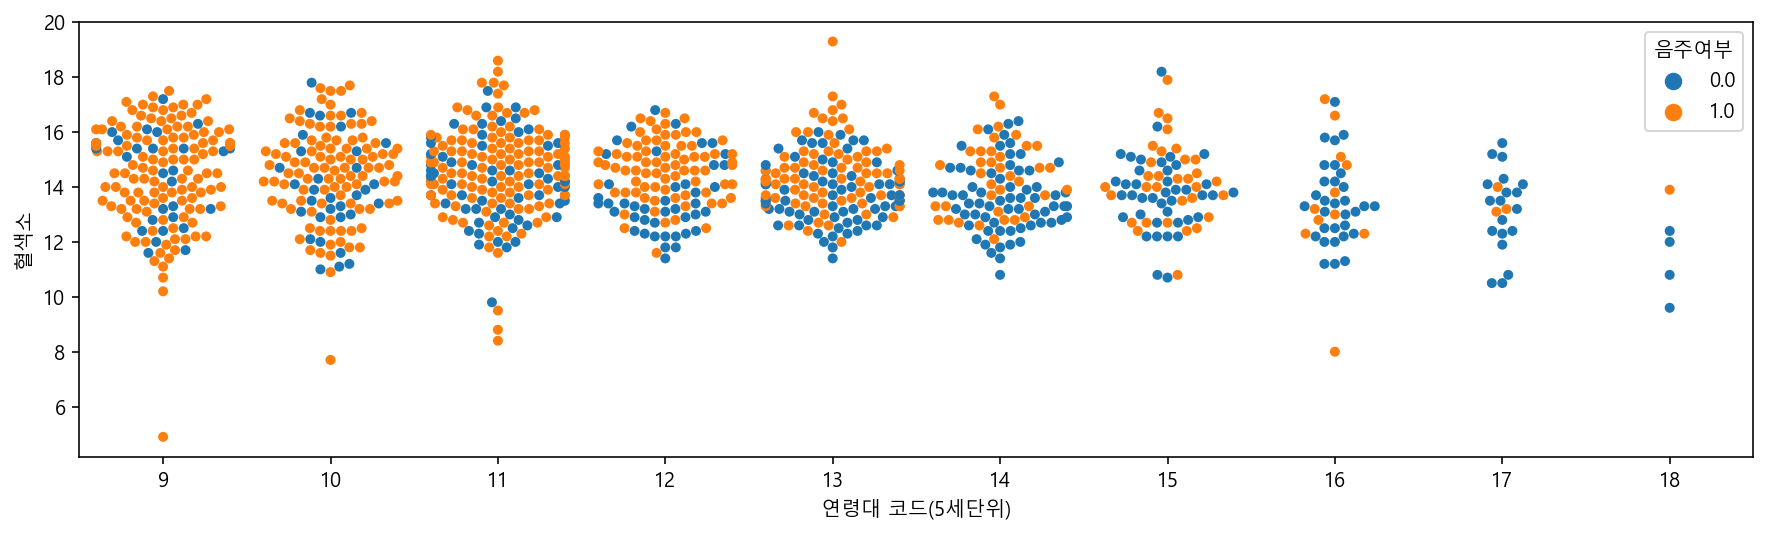

In [62]:
# swarmplot으로 연령대코드(5세단위)에 따른 혈색소-음주여부에 따라 다른 색상으로 표현
plt.figure(figsize=(15, 4))
sns.swarmplot(data=df_sample, x="연령대 코드(5세단위)", y="혈색소", hue="음주여부")

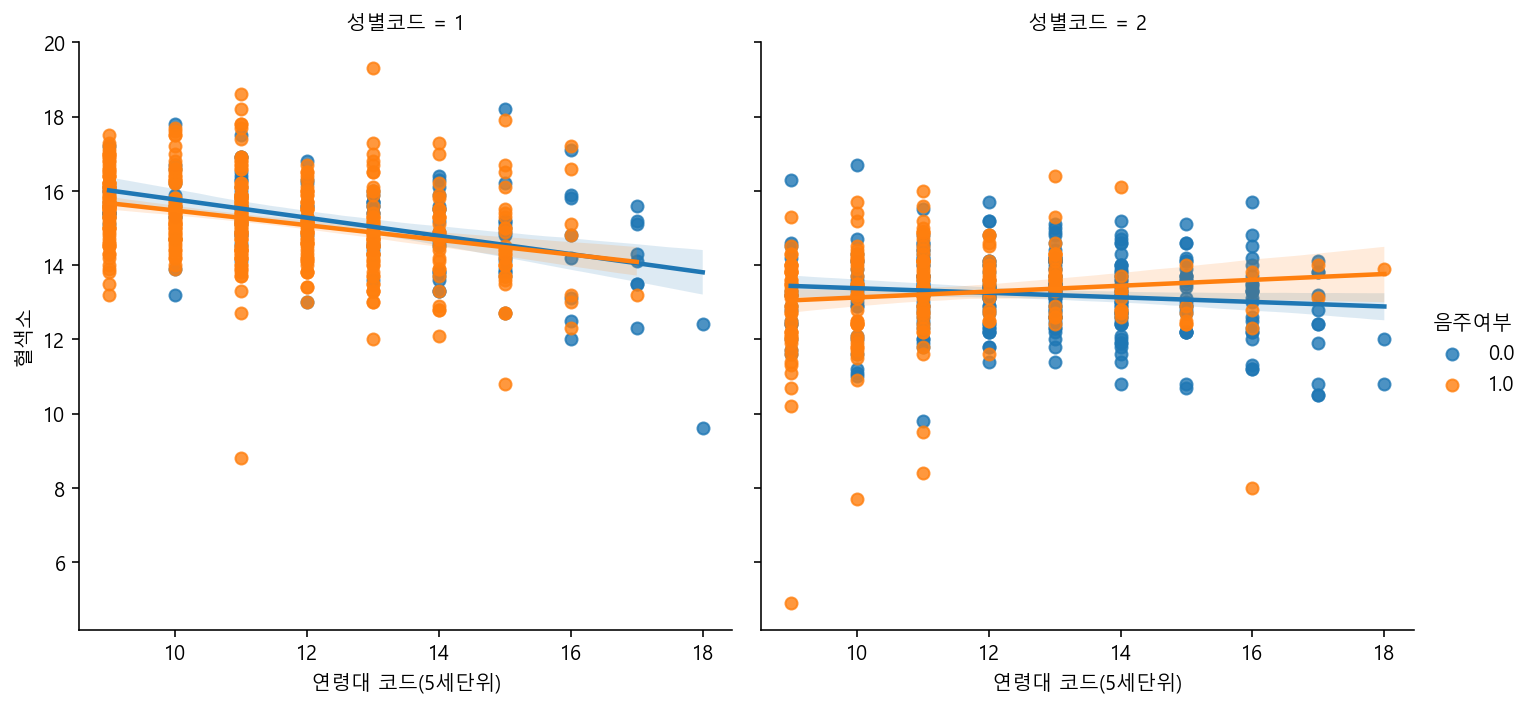

In [63]:
# lmplot으로 연령대코드(5세단위)에 따른 혈색소-음주여부에 따라 다른 색상으로 표현
sns.lmplot(data=df_sample, x="연령대 코드(5세단위)", y="혈색소", hue="음주여부", col="성별코드")

### 수치형 데이터 시각화

#### scatterplot - 산점도
* 수치형 vs 수치형 데이터의 상관 관계를 볼 때 주로 사용
* 점의 크기를 데이터의 수치에 따라 다르게 볼 수 있음

<AxesSubplot:xlabel='(혈청지오티)AST', ylabel='(혈청지오티)ALT'>

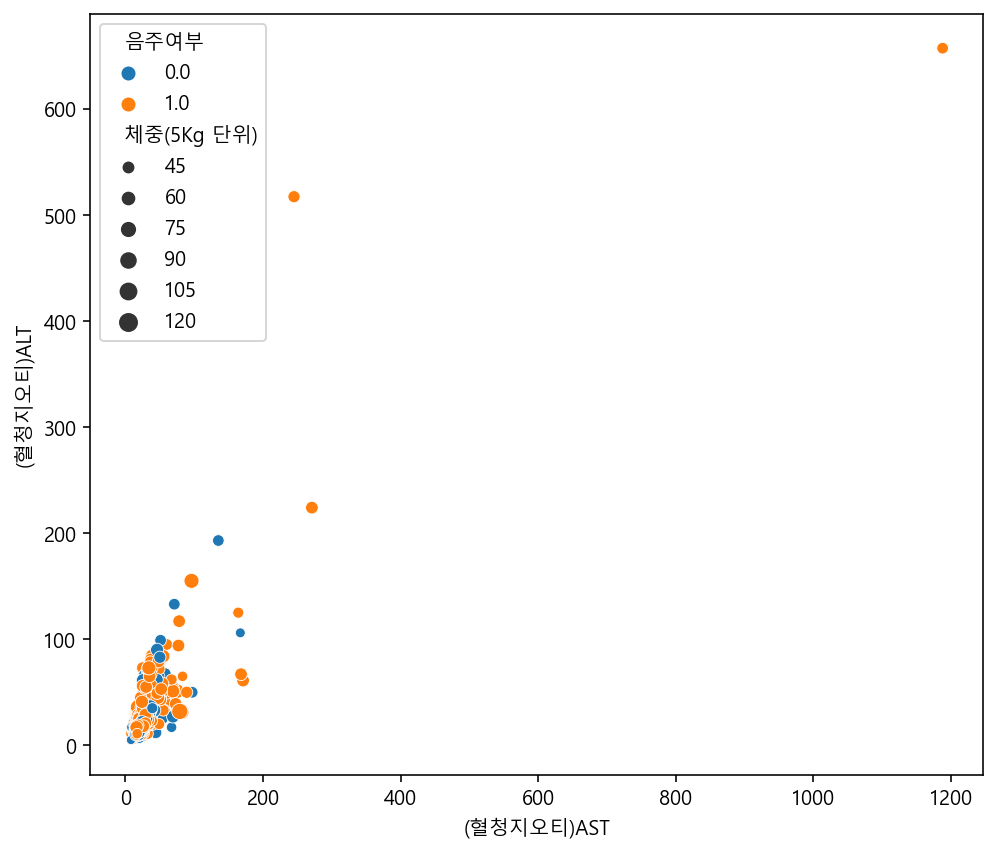

In [64]:
# # scatterplot 으로 "(혈청지오티)AST", "(혈청지오티)ALT" -음주여부에 따라 다른 색상으로 표현
plt.figure(figsize=(8, 7))
sns.scatterplot(data=df_sample, x="(혈청지오티)AST", y="(혈청지오티)ALT", hue="음주여부", 
                size="체중(5Kg 단위)")

#### lmplot - 상관 관계를 보기

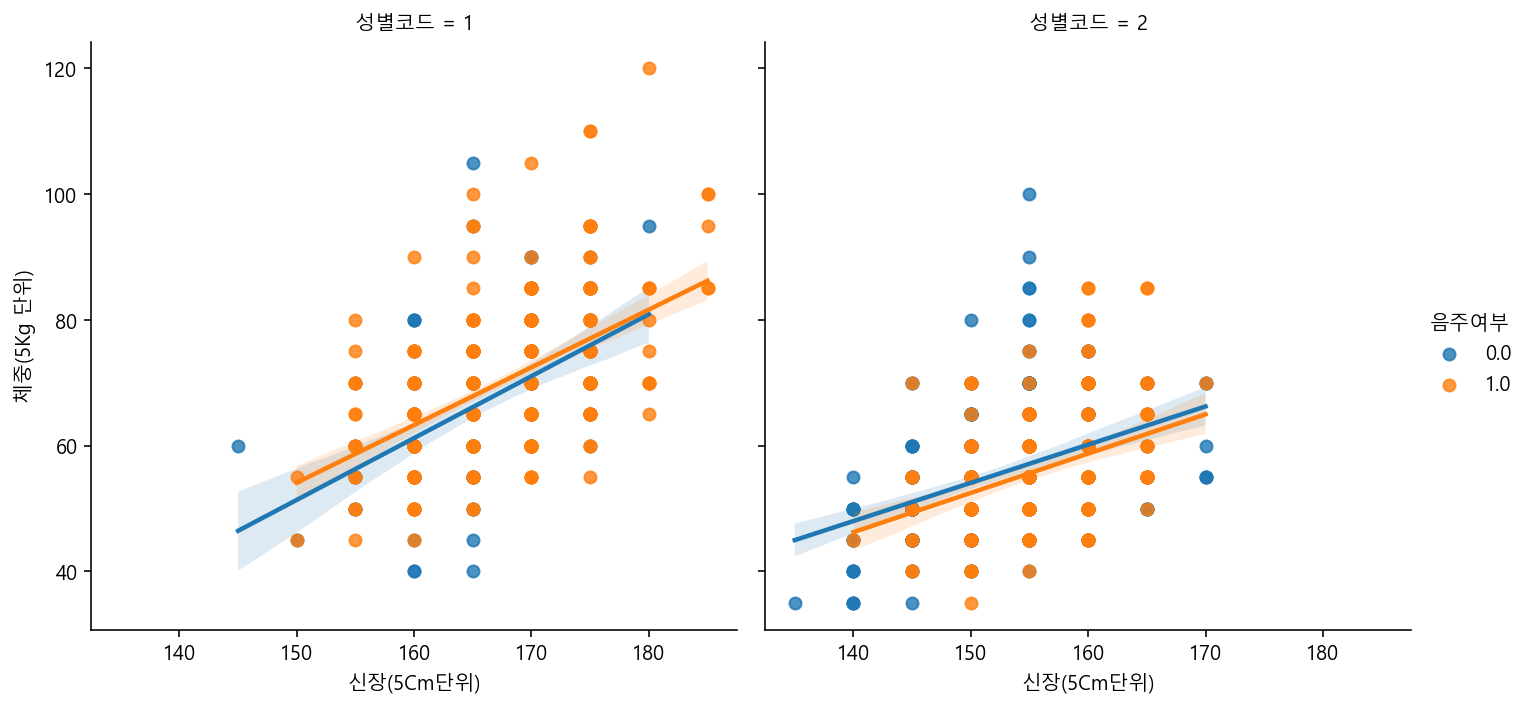

In [65]:
# lmplot 으로 신장(5Cm단위)에 따른 체중(5Kg 단위)-음주여부에 따라 다른 색상으로 표현
sns.lmplot(data=df_sample, x="신장(5Cm단위)", y="체중(5Kg 단위)", hue="음주여부", col="성별코드")

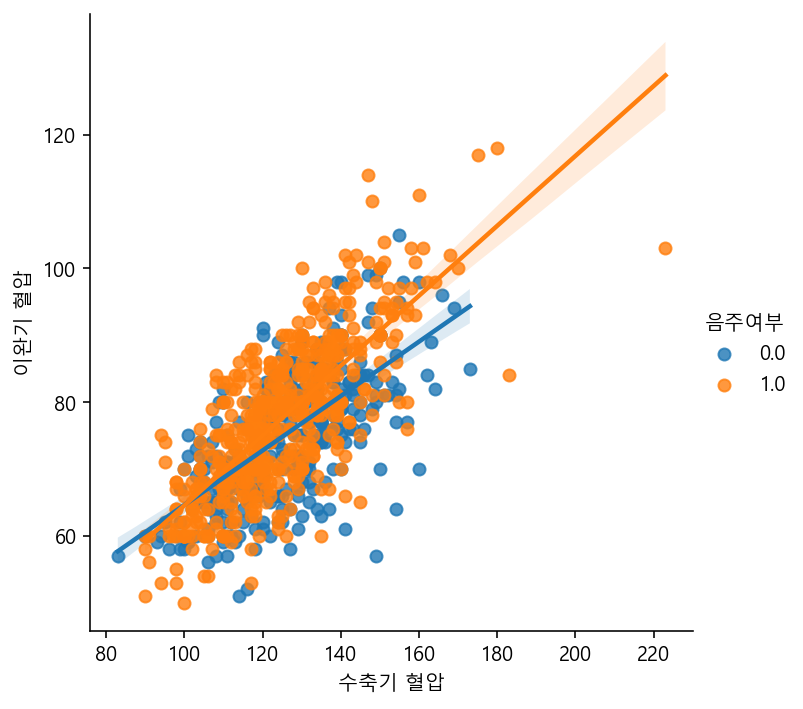

In [66]:
# lmplot 으로 수축기, 이완기혈압-음주여부에 따라 다른 색상
sns.lmplot(data=df_sample, x="수축기 혈압", y="이완기 혈압", hue="음주여부")

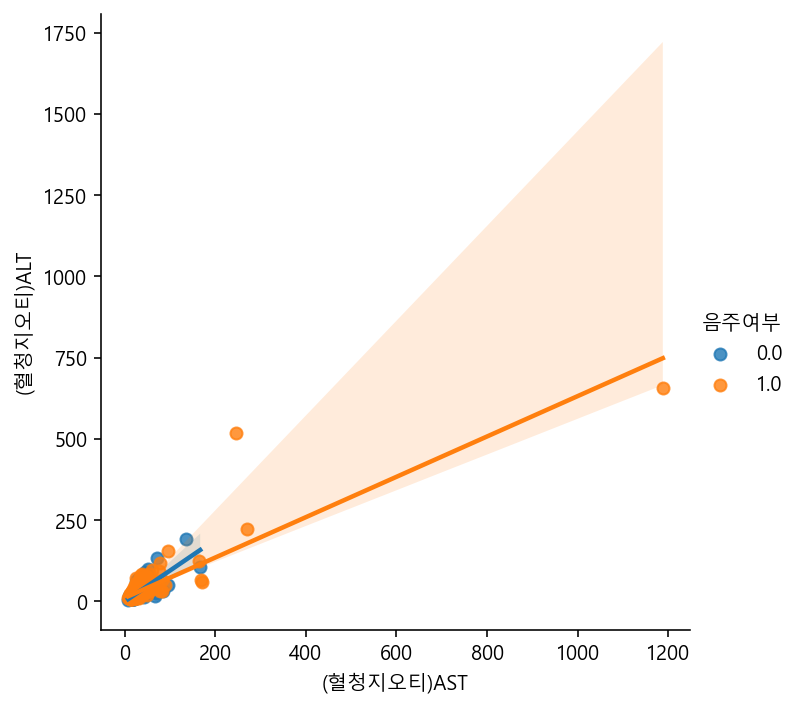

In [67]:
# lmplot으로 "(혈청지오티)AST", "(혈청지오티)ALT"-음주여부에 따라 다른 색상
sns.lmplot(data=df_sample, x="(혈청지오티)AST", y="(혈청지오티)ALT", hue="음주여부")

#### 이상치 다루기

In [68]:
# "(혈청지오티)AST" 와 "(혈청지오티)ALT" 가 400 이하인 값만 데이터프레임 형태로 추출(정상 데이터)
df_ASLT = df_sample[(df_sample["(혈청지오티)AST"] < 400) & (df_sample["(혈청지오티)ALT"] < 400)]

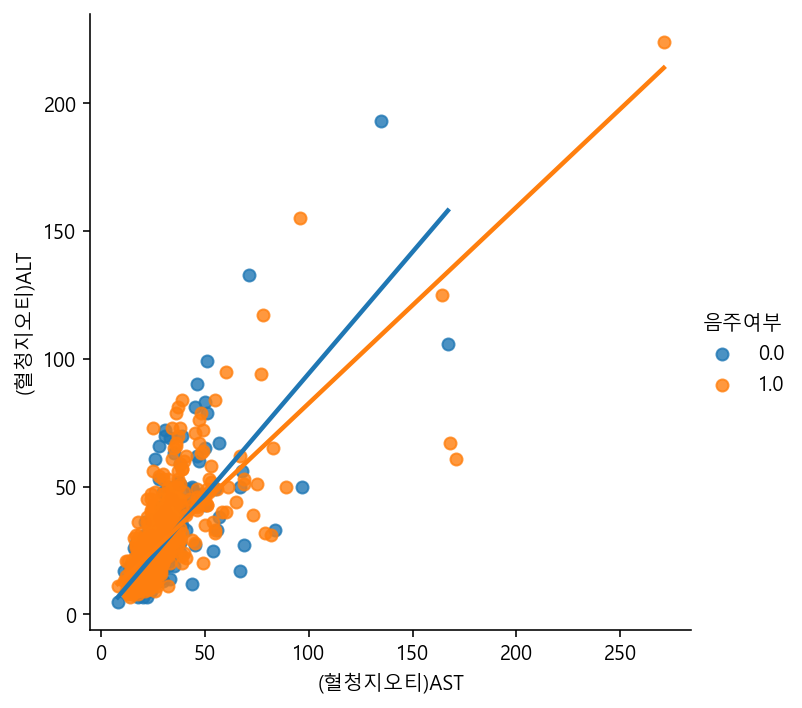

In [69]:
# 이상치를 제거한 "(혈청지오티)AST" 와 "(혈청지오티)ALT" 를 lmplot으로 그리기-음주여부에 따라 다른 색으로 표현
sns.lmplot(data=df_ASLT,  x="(혈청지오티)AST", y="(혈청지오티)ALT", hue="음주여부", ci=None)

In [70]:
# "(혈청지오티)AST" 나 "(혈청지오티)ALT" 가 400 이상인 값만 데이터프레임 형태로 추출(비정상 데이터)
df_ASLT_high = df[(df["(혈청지오티)AST"] >= 400) | (df["(혈청지오티)ALT"] >= 400)]

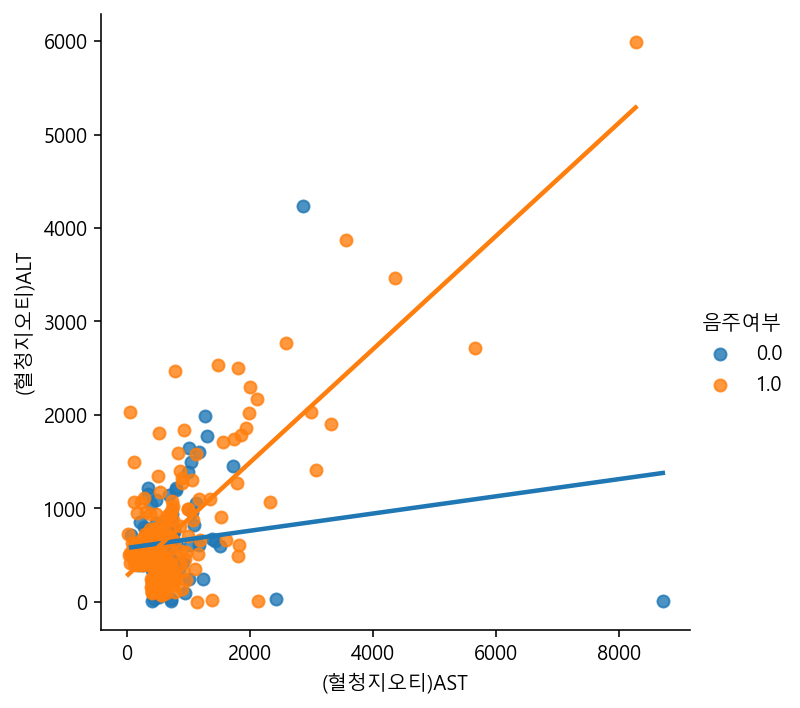

In [71]:
sns.lmplot(data=df_ASLT_high,  x="(혈청지오티)AST", y="(혈청지오티)ALT", hue="음주여부", ci=None)

In [72]:
df_ASLT_high_8000 = df_ASLT_high[df_ASLT_high["(혈청지오티)AST"] > 8000]
df_ASLT_high_8000.iloc[:, 10:27]

,청력(좌),청력(우),수축기 혈압,이완기 혈압,식전혈당(공복혈당),총 콜레스테롤,트리글리세라이드,HDL 콜레스테롤,LDL 콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부
113014,1.0,1.0,100.0,58.0,112.0,NaN,NaN,NaN,NaN,14.9,1.0,0.7,8712.0,6.0,71.0,3.0,0.0
310369,1.0,1.0,92.0,73.0,75.0,91.0,158.0,19.0,40.0,13.8,2.0,4.4,8270.0,5990.0,355.0,1.0,1.0


#### 상관분석
* r이 -1.0과 -0.7 사이이면, 강한 음적 선형관계,
* r이 -0.7과 -0.3 사이이면, 뚜렷한 음적 선형관계,
* r이 -0.3과 -0.1 사이이면, 약한 음적 선형관계,
* r이 -0.1과 +0.1 사이이면, 거의 무시될 수 있는 선형관계,
* r이 +0.1과 +0.3 사이이면, 약한 양적 선형관계,
* r이 +0.3과 +0.7 사이이면, 뚜렷한 양적 선형관계,
* r이 +0.7과 +1.0 사이이면, 강한 양적 선형관계

In [73]:
# 상관계수에 사용할 컬럼을 변수에 담습니다.
columns = ['연령대 코드(5세단위)', '체중(5Kg 단위)', '신장(5Cm단위)', '허리둘레', 
           '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', 
           '수축기 혈압', '이완기 혈압', '식전혈당(공복혈당)', 
           '총 콜레스테롤', '트리글리세라이드', 'HDL 콜레스테롤', 'LDL 콜레스테롤', '혈색소', '요단백', 
           '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마 지티피', '흡연상태', '음주여부']
columns

['연령대 코드(5세단위)',
 '체중(5Kg 단위)',
 '신장(5Cm단위)',
 '허리둘레',
 '시력(좌)',
 '시력(우)',
 '청력(좌)',
 '청력(우)',
 '수축기 혈압',
 '이완기 혈압',
 '식전혈당(공복혈당)',
 '총 콜레스테롤',
 '트리글리세라이드',
 'HDL 콜레스테롤',
 'LDL 콜레스테롤',
 '혈색소',
 '요단백',
 '혈청크레아티닌',
 '(혈청지오티)AST',
 '(혈청지오티)ALT',
 '감마 지티피',
 '흡연상태',
 '음주여부']

In [74]:
df_small = df_sample[columns]
df_corr = df_small.corr() # .corr() 함수를 이용해 상관관계 분석
df_corr

,연령대 코드(5세단위),체중(5Kg 단위),신장(5Cm단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기 혈압,이완기 혈압,...,HDL 콜레스테롤,LDL 콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부
연령대 코드(5세단위),1.000000,-0.221678,-0.414363,0.102985,-0.237792,-0.137480,0.184846,0.203279,0.216743,-0.038870,...,-0.061317,-0.232499,-0.199607,0.029036,0.056892,0.034710,-0.040384,-0.066488,-0.164761,-0.351909
체중(5Kg 단위),-0.221678,1.000000,0.658184,0.805619,0.081166,0.079245,-0.028658,-0.048024,0.215313,0.283006,...,-0.376817,0.048177,0.442815,0.047369,0.295684,0.043985,0.166618,0.188488,0.354371,0.249972
신장(5Cm단위),-0.414363,0.658184,1.000000,0.343317,0.152171,0.128649,-0.076783,-0.084849,0.012064,0.187853,...,-0.217301,0.086425,0.529142,0.018102,0.332333,0.017348,0.105957,0.188727,0.472717,0.382014
허리둘레,0.102985,0.805619,0.343317,1.000000,-0.044147,0.009605,0.045806,0.040701,0.283801,0.244159,...,-0.371869,-0.010353,0.309017,0.081128,0.274298,0.049168,0.155557,0.189805,0.238003,0.104278
시력(좌),-0.237792,0.081166,0.152171,-0.044147,1.000000,0.433458,-0.047886,-0.074372,-0.052692,0.052792,...,0.083304,0.121976,0.177170,-0.045523,0.012852,0.033127,0.062018,0.034567,0.080803,0.103582
시력(우),-0.137480,0.079245,0.128649,0.009605,0.433458,1.000000,0.006876,0.068536,0.028258,0.088776,...,0.048880,0.015400,0.100567,-0.020949,0.026207,0.046738,0.035968,0.017729,0.046521,0.016161
청력(좌),0.184846,-0.028658,-0.076783,0.045806,-0.047886,0.006876,1.000000,0.539898,0.007149,-0.058250,...,0.062997,-0.066330,-0.020269,0.036570,0.059373,0.120677,0.069661,0.023333,0.007110,-0.030589
청력(우),0.203279,-0.048024,-0.084849,0.040701,-0.074372,0.068536,0.539898,1.000000,0.077659,0.023436,...,0.050283,-0.014391,-0.028879,0.085775,0.049110,0.133025,0.082986,-0.011064,-0.006057,-0.076072
수축기 혈압,0.216743,0.215313,0.012064,0.283801,-0.052692,0.028258,0.007149,0.077659,1.000000,0.705049,...,-0.017135,0.002647,0.137943,0.081573,0.050265,0.029849,0.058523,0.098947,0.044218,-0.030979
이완기 혈압,-0.038870,0.283006,0.187853,0.244159,0.052792,0.088776,-0.058250,0.023436,0.705049,1.000000,...,-0.018571,0.063261,0.300474,0.066156,0.077608,0.057943,0.118465,0.141388,0.126144,0.111988


In [75]:
# 키에 대한 상관계수가 특정 수치 이상인 데이터
df_corr.loc[df_corr["신장(5Cm단위)"] > 0.1, "신장(5Cm단위)"]

체중(5Kg 단위)    0.658184
신장(5Cm단위)     1.000000
허리둘레          0.343317
시력(좌)         0.152171
시력(우)         0.128649
이완기 혈압        0.187853
트리글리세라이드      0.176851
혈색소           0.529142
혈청크레아티닌       0.332333
(혈청지오티)ALT    0.105957
감마 지티피        0.188727
흡연상태          0.472717
음주여부          0.382014
Name: 신장(5Cm단위), dtype: float64

In [76]:
# 음주여부에 대한 상관계수가 특정 수치 이상인 데이터
df_corr.loc[df_corr["음주여부"] > 0.25,"음주여부"]

신장(5Cm단위)    0.382014
흡연상태         0.289827
음주여부         1.000000
Name: 음주여부, dtype: float64

In [77]:
# 혈색소에 대한 상관계수가 특정 수치 이상인 데이터
df_corr["혈색소"].sort_values(ascending=False).head(7)

혈색소           1.000000
신장(5Cm단위)     0.529142
체중(5Kg 단위)    0.442815
흡연상태          0.437007
허리둘레          0.309017
혈청크레아티닌       0.302206
이완기 혈압        0.300474
Name: 혈색소, dtype: float64

In [78]:
# 감마지티피에 대한 상관계수가 특정 수치 이상인 데이터
df_corr["감마 지티피"].sort_values(ascending=False).head(7)

감마 지티피        1.000000
(혈청지오티)ALT    0.389966
(혈청지오티)AST    0.321716
트리글리세라이드      0.265705
혈색소           0.231606
흡연상태          0.216500
식전혈당(공복혈당)    0.205471
Name: 감마 지티피, dtype: float64

####  heatmap

<AxesSubplot:>

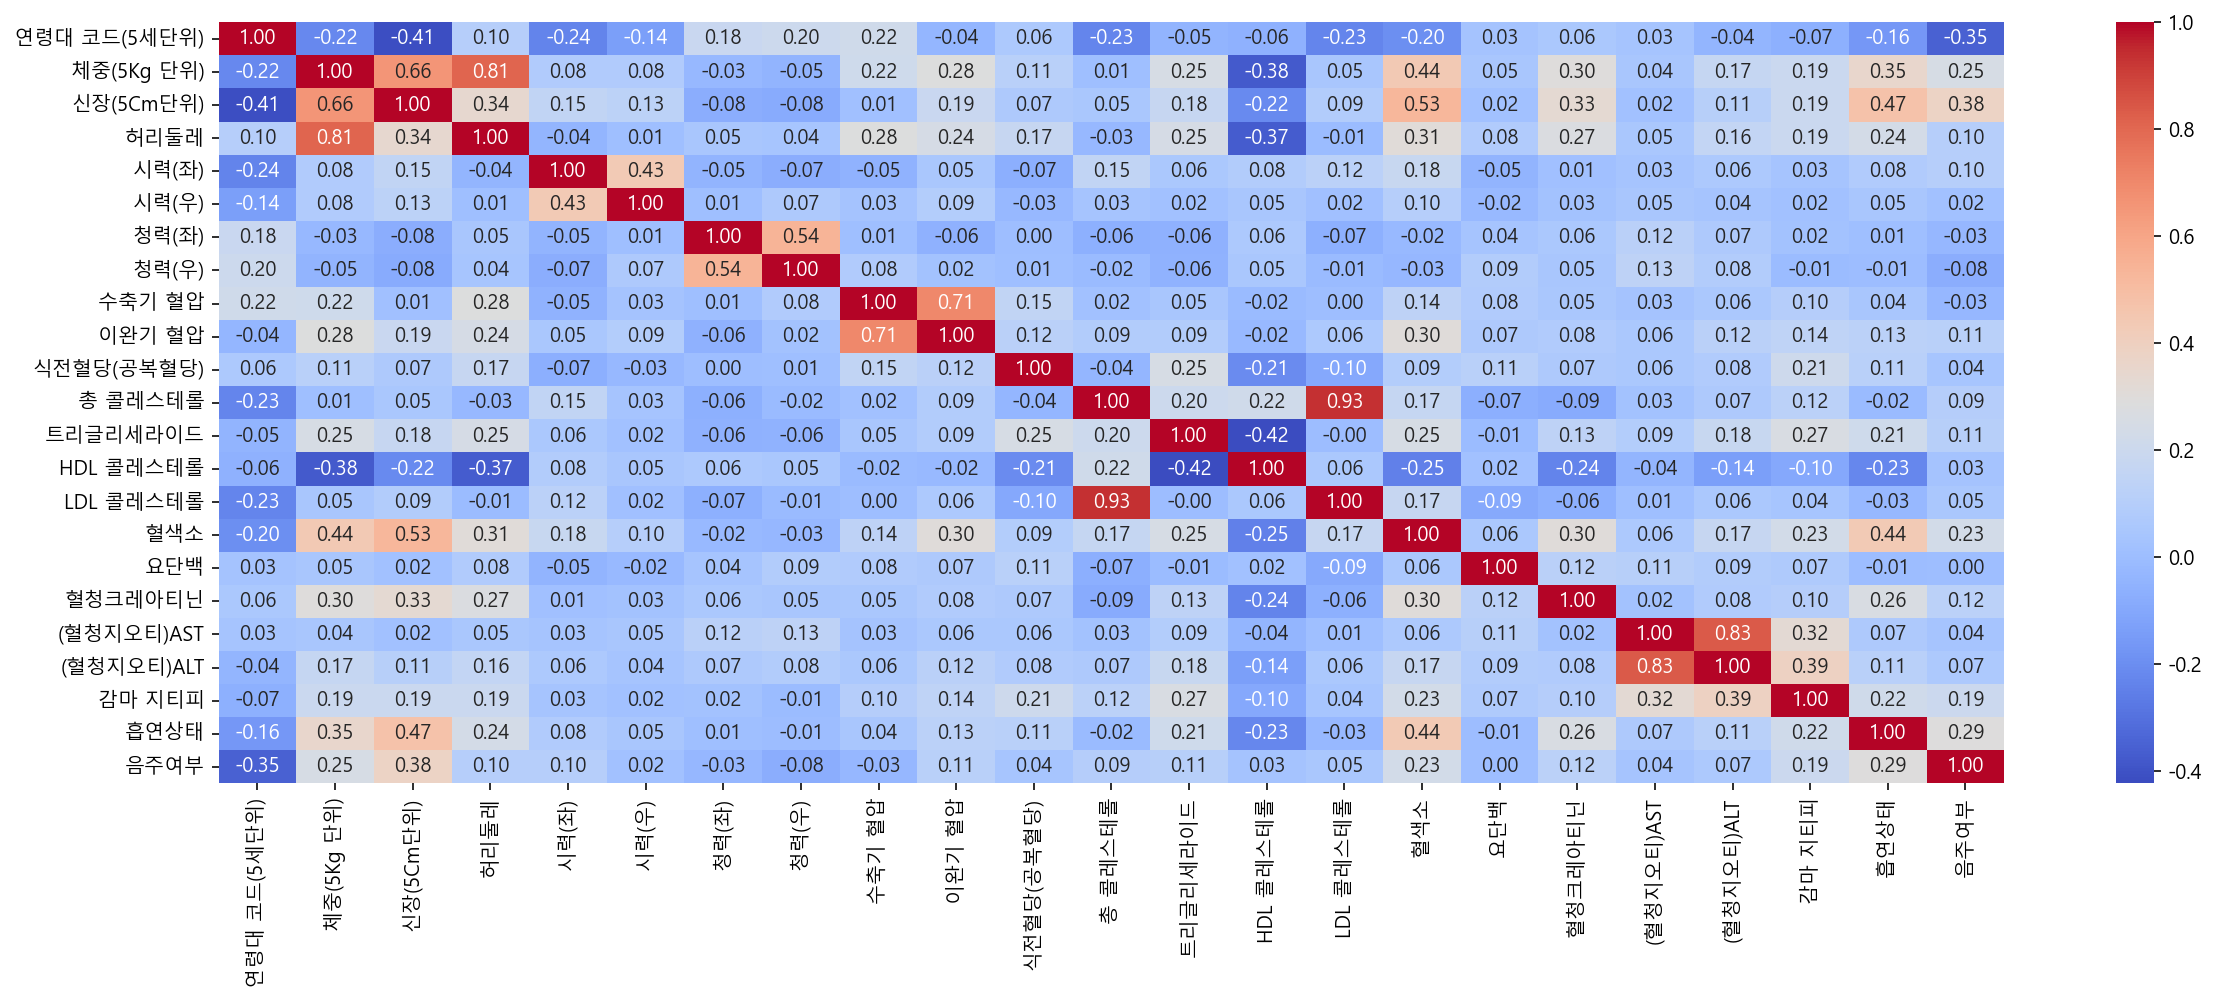

In [79]:
plt.figure(figsize=(20, 7))
sns.heatmap(df_corr, annot=True, fmt=".2f", cmap="coolwarm") # seaborn의 heatmap 함수를 이용해 heatmap으로 표현

<AxesSubplot:>

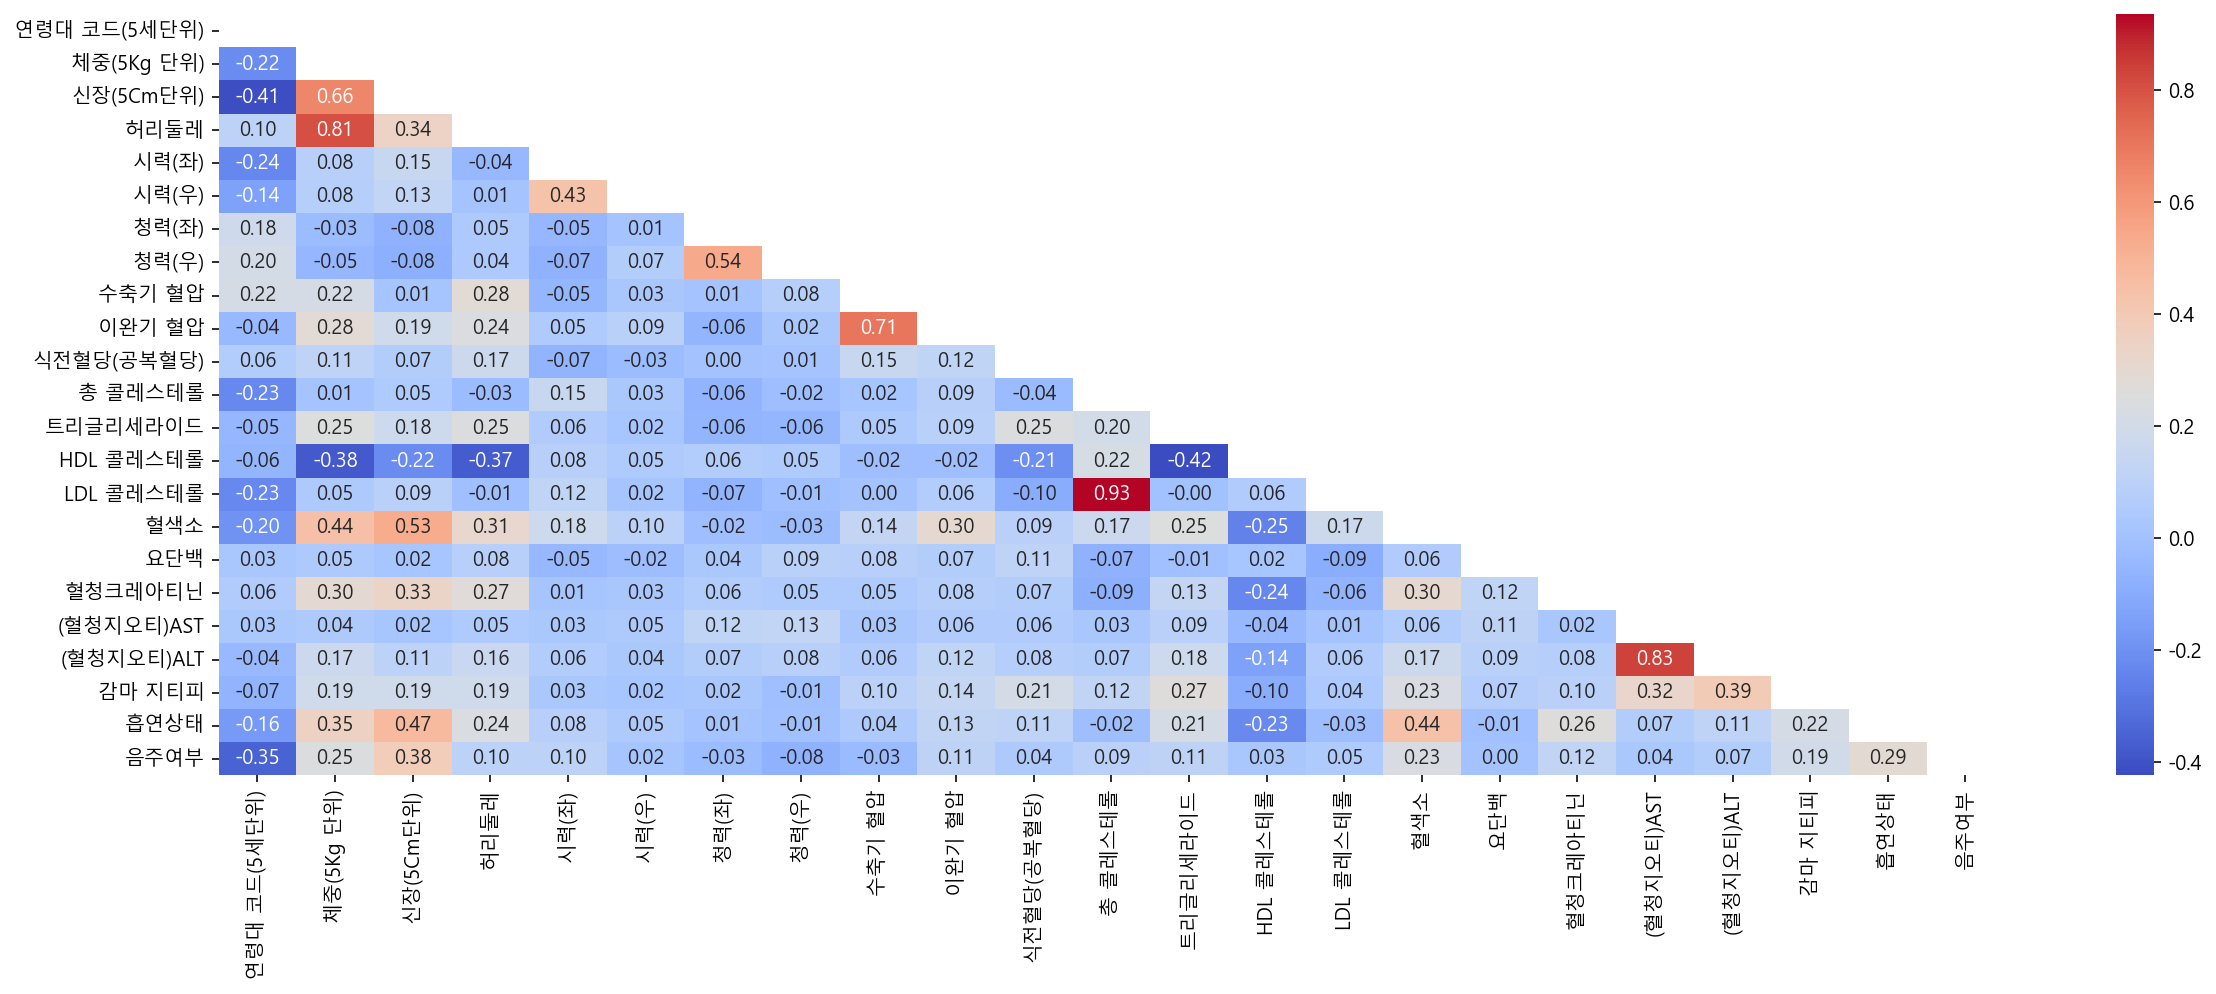

In [80]:
mask = np.triu(np.ones_like(df_corr, dtype=np.bool)) # 양쪽이 아닌 한쪽만 나타나기 위해 명령어 입력

plt.figure(figsize=(20, 7))
sns.heatmap(df_corr, annot=True, fmt=".2f", cmap="coolwarm", mask=mask)